In [1]:
from pyvis.network import Network
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(0)

In [2]:
#Takes a csv describing the network and plots it.
def plot_full_network(df):
    net = Network(bgcolor='#ffffff', notebook = True)
    layer_num = 0
    old_leng = 0
    for ind, leng, lab in zip(df['index'].values, df['length'].values, df['function'].values):
        for i in range(leng):
            net.add_node(i + layer_num, label=lab + '_' + str(i + 1),
                         x=500. * ind,y=100. * (i - (leng -1)/2)) # node id = 1 and label = Node 1
            if(ind > 0):
                for j in range(df['length'].values[ind - 1]):
                    net.add_edge(layer_num + i , layer_num - j -1,
                                 title = 'W^('+str(ind-1) + ')_{' + str(old_leng - j) + ',' + str(i+1) + '}') 
        layer_num += int(leng)
        old_leng = leng
    net.toggle_physics(False)
    net.toggle_drag_nodes(False)
    return net

def plot_partial_network(df):
    net = Network(bgcolor='#ffffff', notebook = True)
    layer_num = 0
    old_leng = 0
    for ind, leng, lab in zip(df['index'].values, df['length'].values, df['function'].values):
        if leng >= 3:
            net.add_node(layer_num + 0, label=lab + '_' +  str(1),
                    x=150. * ind,y=100 * (0 - 3/2) , color ='#dd4b39') # node id = 1 and label = Node 1
            net.add_node(layer_num + 1, label=lab + '_'+ str(2),
                    x=150. * ind,y=100. * (1  - 3/2), color ='#dd4b39') # node id = 1 and label = Node 1
            net.add_node(layer_num + 2, label='...',
                    x=150. * ind,y=100. * (2 - 3/2), shape = 'ellipse', color ='#ffff') # node id = 1 and label = Node 1
            net.add_node(layer_num + 3, label=lab+ '_' + 'N',
                    x=150. * ind,y=100. * (3 - 3/2) , color ='#dd4b39') # node id = 1 and label = Node 1
            leng = 4
        else:
            for i in range(leng):
                net.add_node(i + layer_num, label=lab + '_' + str(i+1),
                             x=150. * ind,y=100. *  (i - (leng -1)/2) , color ='#dd4b39') # node id = 1 and label = Node 1
        if(ind > 0):
            for i in range(leng): 
                for j in range(old_leng):
                    lab = 'W^(' + str(ind - 1) + ')_{'
                    if old_leng - j -1 == 2:
                        lab += '...,'
                    elif old_leng - j -1 == 3:
                        lab += 'N' + ','
                    else: lab += str(old_leng - j) + ','
                    if i == 2:
                        lab += '...}'
                    elif i == 3:
                        lab += 'N' + '}'
                    else: lab += str(i+1) + '}'
                    net.add_edge(layer_num + i , layer_num - j -1, color ='#dd4b39', title = lab)
        old_leng = leng
        layer_num += int(leng)
    net.toggle_physics(False)
    net.toggle_drag_nodes(False)
    return net

In [3]:
net = plot_full_network(pd.read_csv('big_network.csv'))
net.show('mygraph_full_'+ '.html')

# Other resources

Free online book on neural networks and deep learning, contains examples and basic code : http://neuralnetworksanddeeplearning.com/index.html 

# Linear Regression

In [4]:
net = plot_partial_network(pd.read_csv('linear_reg.csv'))
net.show('mygraph_full_'  + '.html')

Want to model an input dataset $X = (\vec{x}^{(1)}, \vec{x}^{(2)} , ... ,\vec{x}^{(M)})$, where $\vec{x}^{(i)} = (x_1^{(i)}, x_2^{(i)}, ... ,x_N^{(i)} ) $,  to it's known output $\tilde{Y} = (\tilde{y}^{(1)},\tilde{y}^{(2)},...,\tilde{y}^{(M)})$. 

Try modelling linearly...
\begin{equation}
    \label{eqn:LinearRegression_output}
     y^{(i)} = y(\vec{w}, b; \vec{x}^{(i)}) = \vec{w} \cdot \vec{x}^{(i)} + b
\end{equation}
for a set of weights $\vec{w} = (w_1, w_2, ... ,w_N )$.

Want to find $\vec{w}$ such that it best models the data. If we select random weights. How do we know how well this moedls the data ... 

Need to quantify how well it models the data ...
Introduce the RMSE loss function
\begin{equation}
    \label{eqn:RMSE_Loss}
     \mathcal{L}[Y,\tilde{Y}] = \frac{1}{2M}\sum_{i=1}^M (y^{(i)} - \tilde{y}^{(i)})^2
\end{equation}
In this simple case can simply choose the best value for the weights and bias by solving the equation ....

\begin{equation}
    \label{eqn:global_minima}
     \frac{\partial\mathcal{L}[Y,\tilde{Y}]}{\partial w_j} = 0; \quad \frac{\partial\mathcal{L}[Y,\tilde{Y}]}{\partial b} = 0;
\end{equation}

However, in order to allow for a generalisation will try to estimate the best values of the weights by iteratively changing the weights and bias by following the path of steepest descent through the loss function plane...

If we change the weights and bias by $\vec{w} \to \vec{w}' = \vec{w} + \Delta\vec{w}$ and $b \to b' = b + \Delta b$, the corresponding change in the loss function approximately given by...
\begin{equation}
    \label{eqn:dLoss_linear}
\Delta\mathcal{L}[Y,\tilde{Y}]\approx \sum_{j=1}^N \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial w_j} \Delta w_j +   \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial b} \Delta b = \frac{1}{M}\sum_{i=1}^M (y^{(i)} - \tilde{y}^{(i)})\left(\sum_{j=1}^N x^{(i)}_j \Delta w_j + \Delta b \right)
\end{equation}
Can ensure we will move in a direction to reduce the loss function by choosing 
\begin{equation}
     \Delta w_j = -\eta  \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{{\partial w_j}} = -\frac{\eta}{M} \sum_{i=1}^M x_j^{(i)} (y^{(i)} - \tilde{y}^{(i)}) \qquad 
     \Delta b = -\eta  \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{{\partial b}} = -\frac{\eta}{M} \sum_{i=1}^M (y^{(i)} - \tilde{y}^{(i)}) 
\end{equation}
where $\eta$ is an arbitrary small parameter. For sufficiently small $\eta$ the change in the loss function can be approximated as
\begin{equation}
    \label{eqn:dLoss_linear_eta}
\Delta\mathcal{L}[Y,\tilde{Y}]\approx - \sum_{j=1}^N \left| \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial w_j}\right|^2 \eta -   \left|\frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial b} \right|^2 \eta  = - \left [ \frac{1}{M^2}\sum_{i=1}^M \left| y^{(i)} - \tilde{y}^{(i)} \right|^2 \left(\left|\sum_{j=1}^N  x^{(i)}_j \right|^2 + 1 \right) \right]\eta
\end{equation}
as we are considering $\eta$ to be positive and are taking the absolute value squared of the rest we see that the change will always be strickly negative, therefore we will continually reduce the loss function, improving the quality of the network. 

### Example code

In [97]:
class linear_regression:
    def __init__(self, x, y, eta):
        self.w = np.random.rand(x.shape[1])*2 - 1
        self.b = np.random.rand(1)*2 - 1
        self.x = x
        self.y_test = y
        self.eta = eta
        self.L_train = []
        
    def calc_y(self, x = []):
        if (len(x)==0):x = self.x 
        return np.dot(x, self.w) + self.b

    def calc_dL_dy(self): 
        return (1/(len(self.w)*len(self.y_test))) * (self.calc_y() - self.y_test)

    def calc_dy_dw(self):
        return  self.x.T

    def calc_dy_db(self):
        return 1.

    def calc_L(self):
        return np.mean((self.calc_y() - self.y_test) ** 2)/2

    def single_update(self):
        #individual update of the weights and biases using gradient descent
        dL_dw = np.dot(self.calc_dy_dw(), self.calc_dL_dy())
        dL_db = np.sum(self.calc_dL_dy() * self.calc_dy_db())
        self.w -= self.eta*dL_dw #/ (self.x.shape[1]) #term at the end regularises for larger N
        self.b -= self.eta*dL_db
    
    def full_update(self, iterations):
        if(len(self.L_train)==0): self.L_train.append(self.calc_L()) 
        #full training, repeats process N times
        for i in range(iterations):
            self.single_update()
            self.L_train.append(self.calc_L())
    
    def plot_train(self):
        print(len(self.L_train))
        plt.figure()
        plt.plot(self.L_train)
        plt.xlabel('Epoch')
        plt.ylabel('RMSE error')
        plt.show()


In the update of the weights a regularisation factor has been added to avoid problems when N is large. 

The above code creates a class for the linear regression. It contains information on the weights and bias, the training data as well as some information on the training.

#### 1 dimensional input

In [104]:
x = np.random.rand(20,1)
w = np.random.rand(x.shape[1])*2 - 1
b = np.random.rand(1)*2 - 1
y = np.sum(w*x,axis = 1) + b + np.random.uniform(-0.04,0.04, (x.shape[0]))

Initial guess w  = [0.09869033] , initial guess b  = [0.02065385]
Actual w   = [0.80378467] , actual b   = [0.13027262]
Measured w = [0.79498778] , measured b = [0.13679883]
51


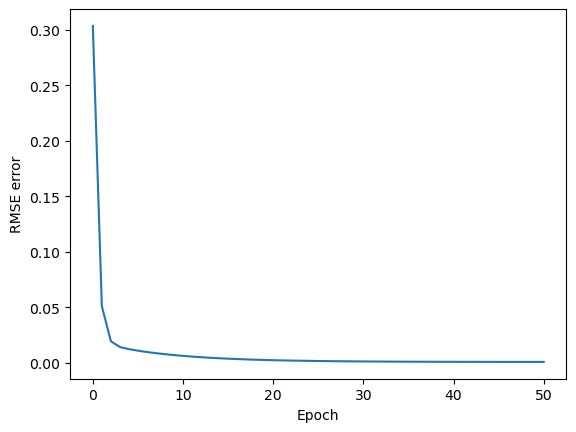

In [105]:
lin_reg = linear_regression(x,y,1)
print('Initial guess w  =' ,lin_reg.w , ', initial guess b  =', lin_reg.b)
print('Actual w   =' ,w , ', actual b   =', b)
lin_reg.full_update(50)
print('Measured w =' ,lin_reg.w , ', measured b =', lin_reg.b)
lin_reg.plot_train()

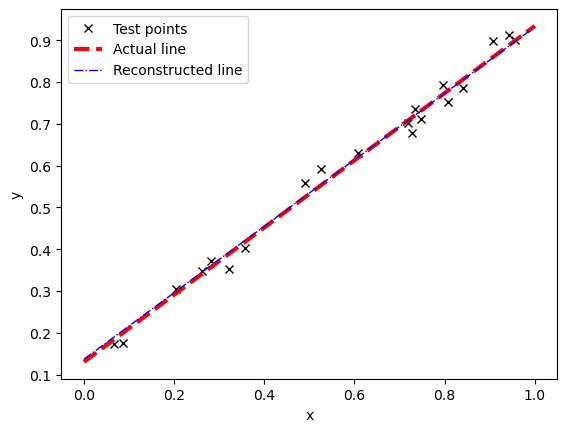

In [106]:
plt.plot(x,y, 'kx', label = 'Test points')
plt.plot([0,1], [b, w+b], 'r--', lw=3, label = 'Actual line')
x_lin = np.array([[0],[1]])
plt.plot(x_lin,lin_reg.calc_y(x_lin), 'b-.', lw=1, label = 'Reconstructed line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Gradient descent

In [107]:
np.random.seed(0)
x = np.random.rand(100,1)
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
y = np.sum(w*x,axis = 1) + b + np.random.uniform(-0.04,0.04, (x.shape[0]))
lin_reg = linear_regression(x,y,0.1)
w_run = np.array([lin_reg.w[0]]) #
b_run = np.array([lin_reg.b[0]]) # 
for i in range(5000):
    lin_reg.full_update(1)
    w_run=np.append(w_run,lin_reg.w[0])
    b_run=np.append(b_run,lin_reg.b[0])


<IPython.core.display.Javascript object>


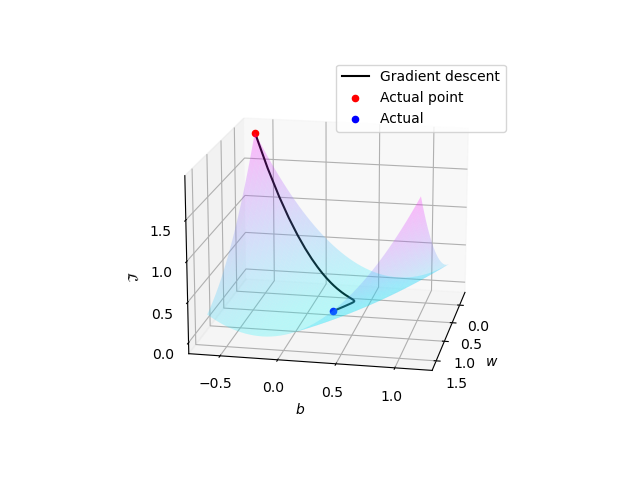

(50, 50)
Surface is the surface of loss function for different weights and biases. The red dot is the starting guess and the blue point is the actual value.


In [108]:
%matplotlib notebook
ax = plt.figure().add_subplot(projection='3d')
dw = (abs(w - w_run)).max()
wlim = [w - dw,w+dw]
db = (abs(b - b_run)).max()
blim = [b - db,b+db]
ww, bb = np.meshgrid(np.linspace(wlim[0],wlim[1],50), np.linspace(blim[0],blim[1],50), sparse=True)
yy = np.mean(np.array([((ww*x[i] + bb) - y[i])**2 for i in range(len(y))]),axis= 0) / 2
print(yy.shape)
ax.plot(w_run, b_run, lin_reg.L_train, c ='k') # , c='k'
ax.scatter(w_run[0], b_run[0], lin_reg.L_train[0], c ='r') # , c='k'
ax.scatter(w, b, 0, c ='b') # , c='k'
ax.plot_surface(ww, bb, yy,cmap ='cool',  alpha=0.25) # 
ax.set_xlabel('$w$'); ax.set_ylabel('$b$'); ax.set_zlabel('$\mathcal{L}$');
ax.legend(['Gradient descent', 'Actual point', 'Actual '])
plt.show()

print('Surface is the surface of loss function for different weights and biases. The red dot is the starting guess and the blue point is the actual value.')


<img src="Learning.gif" width="1200" align="left">

<IPython.core.display.Javascript object>


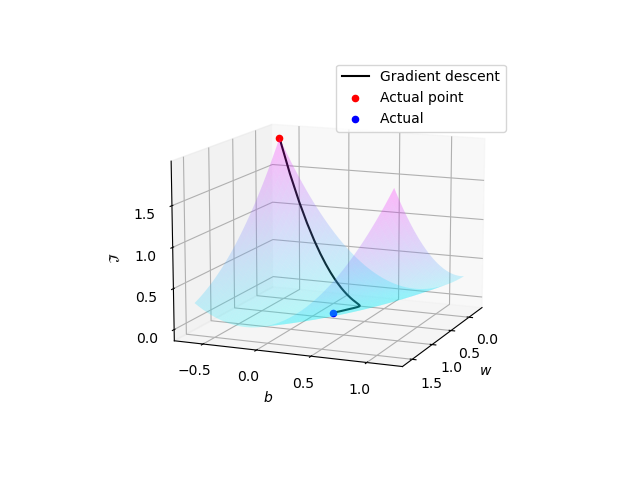

(50, 50)


In [8]:
%matplotlib notebook
ax = plt.figure().add_subplot(projection='3d')
dw = (abs(w - w_run)).max()
wlim = [w - dw,w+dw]
db = (abs(b - b_run)).max()
blim = [b - db,b+db]
ww, bb = np.meshgrid(np.linspace(wlim[0],wlim[1],50), np.linspace(blim[0],blim[1],50), sparse=True)
yy = np.sum(np.array([(1 / len(y))* ((ww*x[i] + bb) - y[i])**2 for i in range(len(y))]),axis= 0)
print(yy.shape)
ax.plot(w_run, b_run, lin_reg.L_train, c ='k') # , c='k'
ax.scatter(w_run[0], b_run[0], lin_reg.L_train[0], c ='r') # , c='k'
ax.scatter(w, b, 0, c ='b') # , c='k'
ax.plot_surface(ww, bb, yy,cmap ='cool',  alpha=0.25) # 
ax.set_xlabel('$w$'); ax.set_ylabel('$b$'); ax.set_zlabel('$\mathcal{L}$');
ax.legend(['Gradient descent', 'Actual point', 'Actual '])
plt.show()

#### 2D input

In [109]:
%matplotlib inline 
x = np.random.rand(100,2)
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
y = np.sum(w*x,axis = 1) + b + np.random.uniform(-0.04,0.04, (x.shape[0]))

Initial guess w  = [-0.90261941 -0.49271495] , initial guess b  = [-0.10772897]
Actual w   = [0.86948853 0.4541624 ] , actual b   = [0.32670088]
Measured w = [0.87139513 0.44314468] , measured b = [0.33121637]
1001


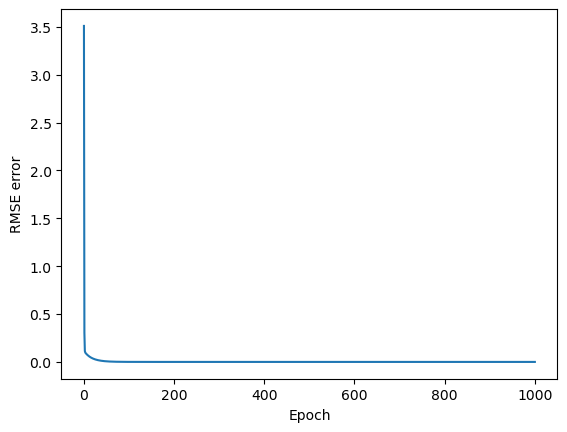

In [110]:
lin_reg = linear_regression(x,y,1)
print('Initial guess w  =' ,lin_reg.w , ', initial guess b  =', lin_reg.b)
print('Actual w   =' ,w , ', actual b   =', b)
lin_reg.full_update(1000)
print('Measured w =' ,lin_reg.w , ', measured b =', lin_reg.b)
lin_reg.plot_train()

<IPython.core.display.Javascript object>


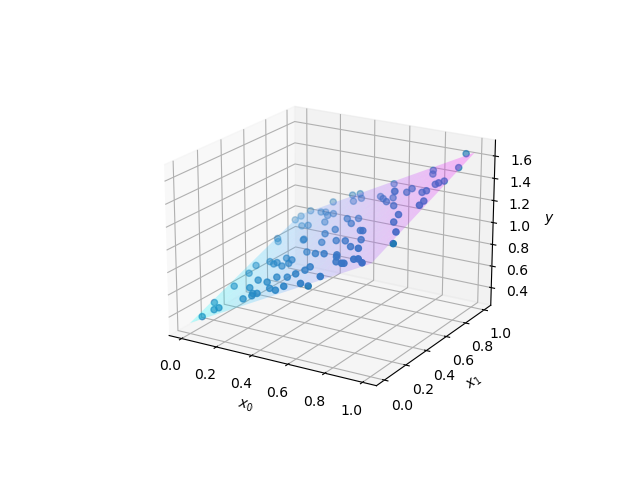

The surface shows the y using the estimated weights and bias from linear regression, the dots are the test set.


In [111]:
%matplotlib notebook
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x[:,0], x[:,1], y, cmap ='cool') # , c='k'
xx, yy = np.meshgrid(np.linspace(0,1,20), np.linspace(0,1,20), sparse=True)
y_surf = lin_reg.w[0]*xx + lin_reg.w[1]*yy + lin_reg.b 
ax.plot_surface(xx, yy, y_surf,cmap ='cool',  alpha=0.25) # 
ax.set_xlabel('$x_0$'); ax.set_ylabel('$x_1$'); ax.set_zlabel('$y$');
plt.show()
print('The surface shows the y using the estimated weights and bias from linear regression, the dots are the test set.')

Difficult to plot for N > 2.

In [112]:
%matplotlib inline 
x = np.random.rand(1000,10)
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
y = np.sum(w*x,axis = 1) + b + np.random.uniform(-0.04,0.04, (x.shape[0]))

Initial guess w  = [ 0.93529705 -0.13210646 -0.00619871 -0.13778459  0.02074862  0.63073185
  0.7367464  -0.96927137  0.3364736   0.24838923] , initial guess b  = [0.22374118]
Actual w   = [0.10496093 0.0660424  0.38398149 0.9252519  0.22626332 0.42224075
 0.6416878  0.49670186 0.02509595 0.6952865 ] , actual b   = [0.91840767]
Measured w = [0.11470943 0.06653987 0.38534402 0.92965508 0.22860306 0.43158038
 0.64588075 0.50102871 0.02591559 0.69625424] , measured b = [0.89834646]
1001


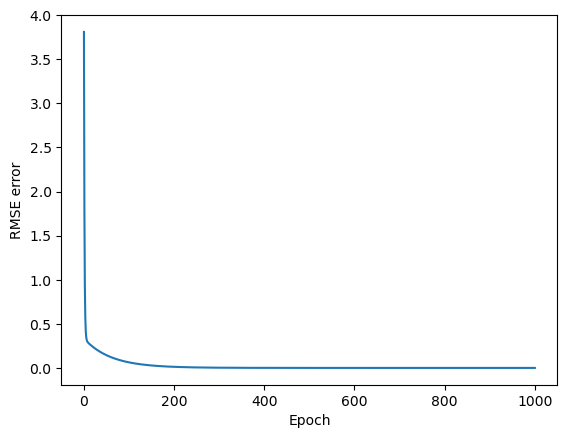

In [113]:
lin_reg = linear_regression(x,y,1)
print('Initial guess w  =' ,lin_reg.w , ', initial guess b  =', lin_reg.b)
print('Actual w   =' ,w , ', actual b   =', b)
lin_reg.full_update(1000)
print('Measured w =' ,lin_reg.w , ', measured b =', lin_reg.b)
lin_reg.plot_train()

#### Real data example?

### General activation function

Linear equation may not accurately model the data try different function... 
\begin{equation}
    \label{eqn:Regression_output}
     y^{(i)} = y(\vec{w}, b; \vec{x}^{(i)}) = f(\vec{w} \cdot \vec{x}^{(i)} + b)= f(z^{(i)})
\end{equation}

Want to find the affects of a small change in the weights and biases on the loss function...
\begin{equation}
    \label{eqn:dLoss_general}
     \Delta\mathcal{L}[Y,\tilde{Y}]\approx \sum_{j=1}^N \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial w_j} \Delta w_j +   \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial b} \Delta b  = 
     \sum_{i=1}^{M}\frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial y^{(i)}} \frac{\partial y^{(i)}}{\partial z^{(i)}} \left( \sum_{j=1}^N x_j \Delta w_j +  \Delta b \right) = \sum_{i=1}^{M} \left( \sum_{j=1}^N x_j^{(i)} \Delta w_j +  \Delta b \right)\delta ^{(i)} 
\end{equation}
where $\delta$ is the error function. This will be used more later when we discuss the backpropagation algorthim. It is defined as
\begin{equation}
    \label{eqn:error}
     \delta ^{(i)} =  \frac{\partial\mathcal{L}[Y,\tilde{Y}]}{\partial z^{(i)}} =  \frac{\partial\mathcal{L}[Y,\tilde{Y}]}{\partial y^{(i)}} \frac{\partial y^{(i)}}{\partial z^{(i)}} 
\end{equation}
Choose to change the weights and bias such that the loss function is reduced. Can do this simply by choosing the change in weights and biases to be
\begin{equation}
     \Delta w_j = -\eta  \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial w_j} = -\eta \sum_{i=1}^M x_j^{(i)} \delta^{(i)} \qquad 
     \Delta b = -\eta  \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial b} = -\eta \sum_{i=1}^M \delta^{(i)} 
\end{equation}
such that, for an arbirary small parameter $\eta$, the change in the loss function becomes
\begin{equation}
    \label{eqn:dLoss_general_eta}
\Delta\mathcal{L} \approx   - \left|\frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial w_j}\right|^2 \eta - \left|\frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial b}\right|^2 \eta = -\sum_{i=1}^{M} \left( \sum_{j=1}^N \left|x_j^{(i)}\right|^2 +  1 \right)\left|\delta ^{(i)}\right|^2\eta .
\end{equation}
This will therefore lead to a smaller loss value. Add diagram of ball rolling down hill, the classic and description of ball rolling down a hill, path of steepest descent ....


In [121]:
class single_node:
    def __init__(self, x, y, eta, activation):
        self.w = np.random.rand(x.shape[1])*2 - 1
        self.b = np.random.rand(1)*2 - 1
        self.x = x
        self.y_test = y
        self.eta = eta
        self.L_train = []
        self.activation = activation
    
    def calc_z(self, x = []):
        if(len(x) == 0): x = self.x
        return np.dot(x, self.w) + self.b

    def calc_y(self, x = []):
        if(len(x) == 0): x = self.x
        if(self.activation == "tanh"):
            y = np.tanh(self.calc_z(x))
        elif(self.activation == "sigmoid"):
            y = 1 / (1 + np.exp(-self.calc_z(x))) 
        else:
            y = self.calc_z(x)
        return y
    
    def calc_dy_dz(self):
        if(self.activation == "tanh"):
            dy_dz = 1 - (self.calc_y()**2.)
        elif(self.activation == "sigmoid"):
            dy_dz = self.calc_y() * (1 - self.calc_y())
        else:
            dy_dz = np.ones_like(self.calc_y())
        return dy_dz
    
    def calc_dL_dy(self):
        return (1/(len(self.w)*len(self.y_test))) * (self.calc_y() - self.y_test)

    def error_function(self):
        return self.calc_dL_dy() * self.calc_dy_dz()
     
    def calc_dz_dw(self):
        return  self.x.T  

    def calc_dz_db(self):
        return 1.

    def calc_L(self): 
        return np.mean((self.calc_y() - self.y_test) ** 2)/2

    def single_update(self):
        #individual update of the weights and biases using gradient descent
        delta = self.error_function()
        dL_dw = np.dot(self.calc_dz_dw() , delta)
        dL_db = np.sum(self.calc_dz_db() * delta)
        self.w -= self.eta*dL_dw#dL_dw should be same shape as w 
        self.b -= self.eta*dL_db
        
    def full_update(self, iterations):
        #full training, repeats process N times
        for i in range(iterations):
            self.single_update()
            self.L_train.append(self.calc_L())
    
    def plot_train(self):
        plt.plot(np.arange(len(self.L_train)),self.L_train)
        plt.xlabel('Epoch')
        plt.ylabel('RMSE error')
        plt.show()

Initial guess w  = [0.10986279] , initial guess b  = [0.75761959]
Actual w   = [-0.14386283] , actual b   = [-0.81182099]
Measured w = [-0.15207891] , measured b = [-0.80993894]


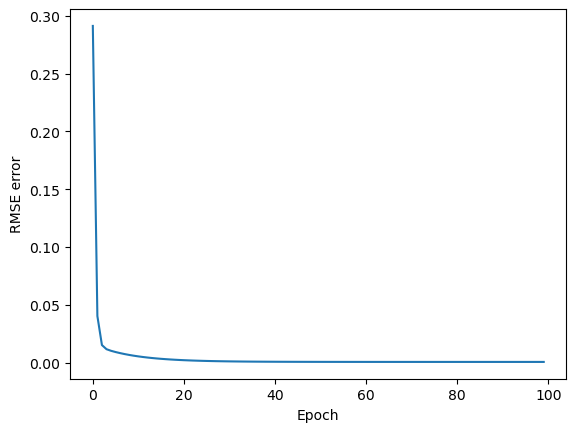

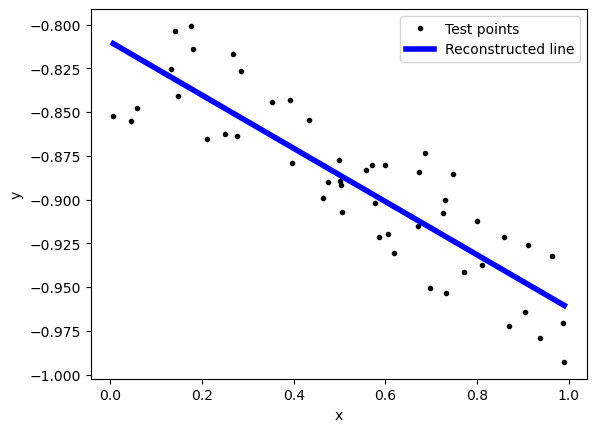

In [124]:
%matplotlib inline 
x = np.random.rand(50,1)#* 16 - 8
w = np.random.rand(x.shape[1]) * 2 -1
b = np.random.rand(1)* 2 -1
z = np.sum(w*x,axis = 1) + b
y = z + np.random.uniform(-0.04,0.04, (x.shape[0]))# np.tanh(z)#(1 / (1 + np.exp(-z)))  # np.random.uniform(-0.0005,0.0005, (x.shape[0]))
node = single_node(x,y,1, "")
print('Initial guess w  =' ,node.w , ', initial guess b  =', node.b)
print('Actual w   =' ,w , ', actual b   =', b)
node.full_update(100)
print('Measured w =' ,node.w , ', measured b =', node.b)
node.plot_train()
plt.plot(x,y, 'k.', label = 'Test points')
x_lin = np.array([np.linspace(x.min(), x.max(), 100)]).T
plt.plot(x_lin,node.calc_y(x_lin), 'b-', lw=4, label = 'Reconstructed line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Initial guess w  = [0.51193847] , initial guess b  = [-0.80554706]
Actual w   = [0.44358666] , actual b   = [0.89259588]
Measured w = [0.43775705] , measured b = [0.87538696]


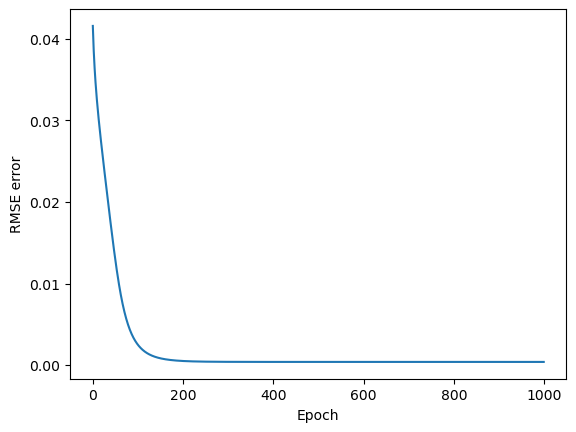

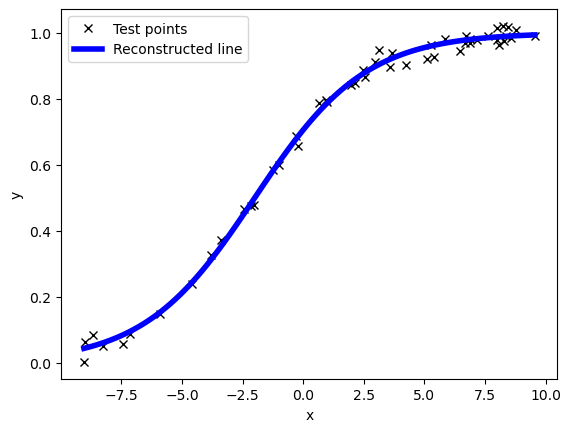

In [125]:
x = np.random.rand(50,1)* 20 - 10
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
z = np.sum(w*x,axis = 1) + b 
y = (1 / (1 + np.exp(-z)))  + np.random.uniform(-0.04,0.04, (x.shape[0])) # np.random.uniform(-0.0005,0.0005, (x.shape[0]))
node = single_node(x,y,1, "sigmoid")
print('Initial guess w  =' ,node.w , ', initial guess b  =', node.b)
print('Actual w   =' ,w , ', actual b   =', b)
node.full_update(1000)
print('Measured w =' ,node.w , ', measured b =', node.b)
node.plot_train()
plt.plot(x,y, 'kx', label = 'Test points')
x_lin = np.array([np.linspace(x.min(), x.max(), 100)]).T
plt.plot(x_lin,node.calc_y(x_lin), 'b-', lw=4, label = 'Reconstructed line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Initial guess w  = [0.81874291] , initial guess b  = [-0.91258642]
Actual w   = [0.61812987] , actual b   = [0.08047874]
Measured w = [5.49628172] , measured b = [0.07106028]


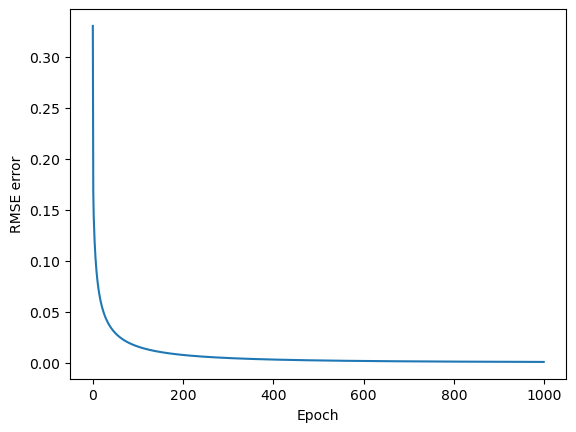

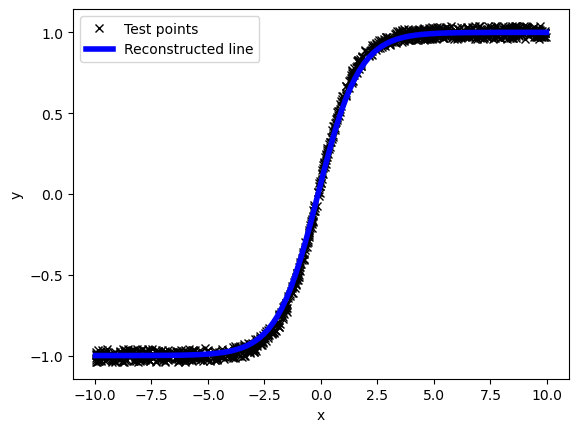

In [126]:
x = np.random.rand(1000,1)* 20 - 10
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
z = np.sum(w*x,axis = 1) + b
y = np.tanh(z) + np.random.uniform(-0.04,0.04, (x.shape[0]))#(1 / (1 + np.exp(-z)))  # np.random.uniform(-0.0005,0.0005, (x.shape[0]))
node = single_node(x / 10,y,1, "tanh")
print('Initial guess w  =' ,node.w , ', initial guess b  =', node.b)
print('Actual w   =' ,w , ', actual b   =', b)
node.full_update(1000)
print('Measured w =' ,node.w , ', measured b =', node.b)
node.plot_train()
plt.plot(x,y, 'kx', label = 'Test points')
x_lin = np.array([np.linspace(x.min(), x.max(), 100)]).T
plt.plot(x_lin,node.calc_y(x_lin / 10), 'b-', lw=4, label = 'Reconstructed line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Examples

Hyperbolic tan loss activtion function.
\begin{equation}
    \label{eqn:tanh}
     f(\vec{w} \cdot \vec{x} + b) = \tanh(\vec{w} \cdot \vec{x} + b); \quad \frac{\partial f(\vec{w} \cdot \vec{x} + b)}{\partial w_j} =x_j(1 - tanh^2(\vec{w} \cdot \vec{x} + b)); \quad \frac{\partial f(\vec{w} \cdot \vec{x} + b)}{\partial b} = (1 - tanh^2(\vec{w} \cdot \vec{x} + b))
\end{equation}
Sigmoid function.
\begin{equation}
    \label{eqn:sigmoid}
      f(x) = \sigma(x) =\frac{1}{1 + e^{-x}}; \quad f'(x) = \sigma'(x) = \frac{e^{-x}}{(1 + e^{-x})^2} = \sigma(x)(1 - \sigma(x));
\end{equation}


Diagram of linear regression thing

## Backpropagation, or how I learned to stop worrying and love the indices

In [18]:
net = plot_partial_network(pd.read_csv('classification.csv'))
net.show('mygraph_full_'  + '.html')

NameError: name 'plot_partial_network' is not defined

## Multiple hidden layers the same but with more indices

In [22]:
net = plot_partial_network(pd.read_csv('hidden.csv'))
net.show('mygraph_full_'  + '.html')

In [209]:
class neural_net:
    def __init__(self,eta, architecture, activation,loss='', l2 = 0):
        self.architecture = architecture 
        self.activation = activation
        self.loss = loss
        if loss == 'cross entropy' and activation[-1] != 'sigmoid': self.loss = ''
        if loss == 'log liklihood' or activation[-1] == 'softmax':
            if not (loss == 'log liklihood' and activation[-1] == 'softmax'):
                self.loss = ''
                self.activation[-1] = 'sigmoid'
        self.num_layers = len(architecture)
        self.w = [(np.random.rand(architecture[i-1], architecture[i]) *2 - 1) for i in range(1, self.num_layers)]
        self.b = [(np.random.rand(architecture[i])*2 - 1) for i in range(1, self.num_layers)]
        self.eta = eta
        self.l2 = l2

    def calc_z(self, a, layer = 1):
        return np.sum(self.w[layer - 1].T * a[layer-1], axis = 1) + self.b[layer - 1] 
   
    def calc_a(self, a, layer = 1):
        if(layer < 1): layer = 1
        if(self.activation[layer] == "tanh"):
            a_layer = np.tanh(self.calc_z(a, layer))
        elif(self.activation[layer] == "sigmoid"):
            a_layer = 1 / (1 + np.exp(-self.calc_z(a , layer))) 
        elif(self.activation[layer] == "softmax"):
            a_layer = np.exp(self.calc_z(a, layer)) / np.sum(np.exp(self.calc_z(a, layer)))
        else:
            a_layer = self.calc_z(a, layer)
        return a_layer
    
    def calc_da_dz(self, a , layer = 1):
        if(layer < 1): layer = 1
        if(self.activation == "tanh"):
            dy_dz = 1 - (self.calc_a(a , layer)**2.)
        elif(self.activation == "sigmoid"):
            dy_dz = self.calc_a(a , layer) * (1 - self.calc_a(a , layer))
        else:
            dy_dz = np.ones_like(self.calc_a(a , layer))
        return dy_dz
    
    def calc_dz_da(self, x , layer = 1):
        return self.w[layer-1]
       
    def calc_dz_dw(self, x):
        return x.T
    
    def calc_dz_db(self, x):
        return np.ones_like(x.T)
    
    def calc_dL_daL(self, aL, y):
        return (aL - y)/len(y)
    
    def calc_L(self, aL, y):
        if self.loss == 'cross entropy':
            return - np.mean(y*np.log(aL) + (1-y)*np.log(1-aL))
        elif self.loss == 'log liklihood':
            return np.mean(-np.log(aL[y.argmax(axis = 1)]))
        else:
            return (1/2) * np.mean((aL - y)**2.)

    
    def forward_prop(self, x):
        a = [np.zeros(self.architecture[j]) for j in range(self.num_layers)]
        a[0] = x
        for layer in range(1, self.num_layers): 
            a[layer] = self.calc_a(a, layer)
        return a
    
    def forward_prop_set(self, x):
        output = []
        for sample in range(x.shape[0]):
            output.append(self.forward_prop(x[sample])[-1])
        return np.array(output)
        
    def back_prop(self, a, y):
        delta = [np.zeros(s) for s in self.architecture]
        for end_node in range(self.architecture[-1]):
            if self.loss == 'cross entropy':
                delta[-1] = (self.calc_a(a, self.num_layers -1) - y)
            elif self.loss == 'log liklihood':
                delta[-1] = (self.calc_a(a, self.num_layers -1) - y)
            else:
                delta[-1] = self.calc_dL_daL(a[-1], y) * self.calc_da_dz(a, layer=len(a)-1)
        for layer in range(self.num_layers-2,0, -1):
            delta[layer] = np.sum((self.calc_dz_da(a, layer + 1) * delta[layer + 1]).T *self.calc_da_dz(a , layer),axis=0)
        return delta
    
    def single_epoch(self,training_x, training_y):
        n_samples = training_x.shape[0]
        dw = [np.zeros_like(self.w[i]) for i in range(0, self.num_layers - 1)]
        db = [np.zeros_like(self.b[i]) for i in range(0, self.num_layers - 1)]
        for sample in range(n_samples):
            a = self.forward_prop(training_x[sample])
            delta = self.back_prop(a, training_y[sample])
            for layer in range(1, self.num_layers):
                dw[layer-1] += (np.array([a[layer-1]]).T * delta[layer]) / n_samples
                db[layer-1] += (delta[layer]) / n_samples
        for layer in range(1, self.num_layers):
            self.w[layer-1] = self.w[layer-1]*(1 - (self.eta*self.l2 / n_samples)) - (self.eta * dw[layer-1])#/ n_samples) 
            self.b[layer-1] -= self.eta * db[layer-1]#/ n_samples

    def full_training(self, training_x, training_y,testing_x, testing_y, n_epochs):
        L_training = [self.calc_L(self.forward_prop_set(training_x), training_y)]
        L_testing = [self.calc_L(self.forward_prop_set(testing_x), testing_y)]
        for epoch in range(n_epochs):
            self.single_epoch(training_x, training_y)
            L_training.append(self.calc_L(self.forward_prop_set(training_x), training_y))
            L_testing.append(self.calc_L(self.forward_prop_set(testing_x), testing_y))
        return L_training, L_testing
    
    def stochastic_training(self, training_x, training_y,testing_x, testing_y, n_epochs, n_batches, track = False):
        n_training = len(training_x)
        if n_batches > n_training: n_batches = n_training
        if (n_training%n_batches!= 0): n_batches = n_training
        batch_size = int(n_training/n_batches)
        L_training = [self.calc_L(self.forward_prop_set(training_x), training_y)]
        L_testing = [self.calc_L(self.forward_prop_set(testing_x), testing_y)]
        inds = np.arange(n_training)
        w_best = self.w
        b_best = self.b
        L_best = L_testing[-1]
        if track: print('Batch size = ', batch_size)
        if track: print('n_batches = ', n_batches)
        for epoch in range(n_epochs):
            if track: print('Epoch',epoch, 'L_testing :', L_testing[-1])
            np.random.shuffle(inds);
            training_x = training_x[inds]; training_y = training_y[inds]
            for n in range(n_batches):
                self.single_epoch(training_x[n*batch_size: (n+1)*batch_size], training_y[n*batch_size: (n+1)*batch_size])
            training_aL = self.forward_prop_set(training_x)
            L_training.append(self.calc_L(training_aL, training_y))
            testing_aL = self.forward_prop_set(testing_x)
            L_testing.append(self.calc_L(testing_aL, testing_y))
            if track: print('Train prob:',100 *(np.floor(training_aL.T /  training_aL.max(axis = 1)).T * training_y).sum() / len(training_aL),'%. Test prob:',100 * (np.floor(testing_aL.T /  testing_aL.max(axis = 1)).T * testing_y).sum() / len(testing_aL),'%')
            if(L_testing[-1] < L_best): 
                w_best = self.w
                b_best = self.b
                L_best = L_testing[-1] 
        self.w = w_best
        self.b = b_best
        return L_training, L_testing
            



Batch size =  80
n_batches =  10
Epoch 0 L_testing : 0.701665041575367
Train prob: 67.40708343425428 %. Test prob: 67.94875783464283 %
Epoch 1 L_testing : 0.6539643663797385
Train prob: 67.40708343425429 %. Test prob: 67.94875783464283 %
Epoch 2 L_testing : 0.638263975301651
Train prob: 67.40708343425429 %. Test prob: 67.94875783464283 %
Epoch 3 L_testing : 0.6327991644660059
Train prob: 67.4070834342543 %. Test prob: 67.94875783464283 %
Epoch 4 L_testing : 0.6304985747314898
Train prob: 67.40708343425429 %. Test prob: 67.94875783464283 %
Epoch 5 L_testing : 0.6293738678617958
Train prob: 67.40708343425429 %. Test prob: 67.94875783464283 %
Epoch 6 L_testing : 0.6286530846799443
Train prob: 67.40708343425429 %. Test prob: 67.94875783464283 %
Epoch 7 L_testing : 0.6280947893611405
Train prob: 67.4070834342543 %. Test prob: 67.94875783464283 %
Epoch 8 L_testing : 0.6276238921345508
Train prob: 67.40708343425429 %. Test prob: 67.94875783464283 %
Epoch 9 L_testing : 0.6272075283522976
Tra

Train prob: 67.40708343425429 %. Test prob: 67.94875783464283 %
Epoch 81 L_testing : 0.6216759370132606
Train prob: 67.40708343425429 %. Test prob: 67.94875783464283 %
Epoch 82 L_testing : 0.6216731215476586
Train prob: 67.4070834342543 %. Test prob: 67.94875783464283 %
Epoch 83 L_testing : 0.6216712582681866
Train prob: 67.40708343425429 %. Test prob: 67.94875783464283 %
Epoch 84 L_testing : 0.6216694976602547
Train prob: 67.4070834342543 %. Test prob: 67.94875783464283 %
Epoch 85 L_testing : 0.621668245175944
Train prob: 67.40708343425429 %. Test prob: 67.94875783464283 %
Epoch 86 L_testing : 0.6216661756265094
Train prob: 67.40708343425429 %. Test prob: 67.94875783464283 %
Epoch 87 L_testing : 0.6216644440882648
Train prob: 67.4070834342543 %. Test prob: 67.94875783464283 %
Epoch 88 L_testing : 0.6216631434930391
Train prob: 67.40708343425429 %. Test prob: 67.94875783464283 %
Epoch 89 L_testing : 0.6216620910528196
Train prob: 67.40708343425429 %. Test prob: 67.94875783464283 %
Epoc

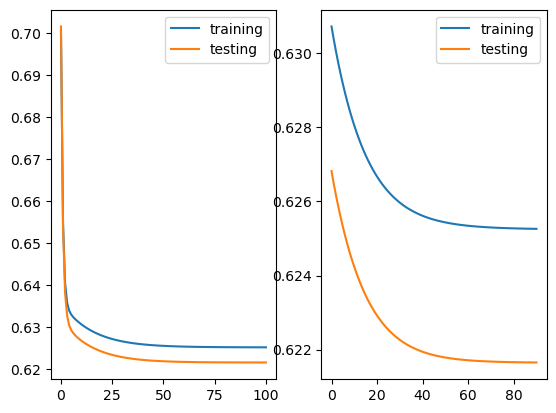

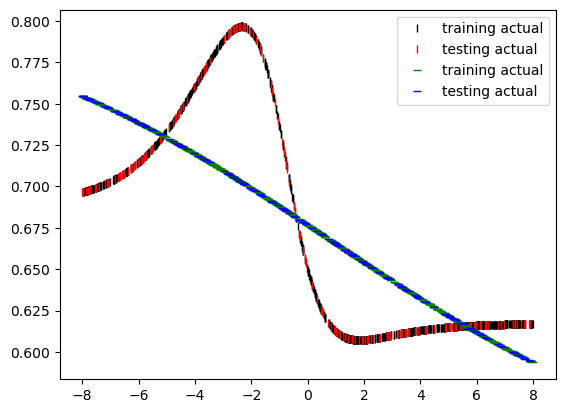

In [193]:
#%reset
%matplotlib inline 
n_samples = 1000
n_batches = 10
n_epochs = 100
test_train_split = 0.8
architecture = [1,3,1]
activation = ['Input', 'tanh', 'sigmoid']
nn_a = neural_net(0.1, architecture, activation)

x = np.random.rand(n_samples,architecture[0]) * 16 -8
y = nn_a.forward_prop_set(x)
inds = np.arange(n_samples)
np.random.shuffle(inds)
training_x = x[inds[:int(n_samples*test_train_split)]]
training_y = y[inds[:int(n_samples*test_train_split)]]
testing_x = x[inds[int(n_samples*test_train_split):]]
testing_y = y[inds[int(n_samples*test_train_split):]]



architecture_b = [1,5,1]
activation_b = ['Input','sigmoid', 'sigmoid']


nn_b = neural_net(0.1, architecture_b, activation_b,'cross entropy',0)
L_training, L_testing = nn_b.stochastic_training(training_x / 8, training_y,testing_x / 8,testing_y , n_epochs, n_batches)

print(nn_b.w)

plt.subplot(1,2,1)
plt.plot(L_training, label = 'training')
plt.plot(L_testing, label = 'testing')
plt.legend()
plt.subplot(1,2,2)
plt.plot(L_training[10:], label = 'training')
plt.plot(L_testing[10:], label = 'testing')
plt.legend()
plt.show()

plt.plot(training_x, training_y, 'k|', label = 'training actual')
plt.plot(testing_x, testing_y, 'r|', label = 'testing actual')
plt.plot(training_x,  nn_b.forward_prop_set(training_x/ 8), 'g_', label = 'training actual')
plt.plot(testing_x,  nn_b.forward_prop_set(testing_x/ 8 ), 'b_', label = 'testing actual')
plt.legend()
plt.show()

## MNIST

In [139]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
n_test = x_test.shape[0]
n_train = x_train.shape[0]

im_width = x_test.shape[1]
im_height = x_test.shape[2]
x_train = x_train.reshape(n_train,im_width*im_height) / 256.
x_test = x_test.reshape(n_test,im_width*im_height) / 256.
y_train = np.array([np.arange(10) == y for y in y_train])
y_test = np.array([np.arange(10) == y for y in y_test])

In [140]:
nn_mnist = neural_net(1, [im_width * im_height,30,10], ['Input', 'sigmoid', 'sigmoid'], 0.01)

For an untrained network
Test set probability : 7.34
[0.95671775 0.87805494 0.18161042 0.12776123 0.55561747 0.12087122
 0.04405274 0.65175497 0.13184918 0.78525099] 0


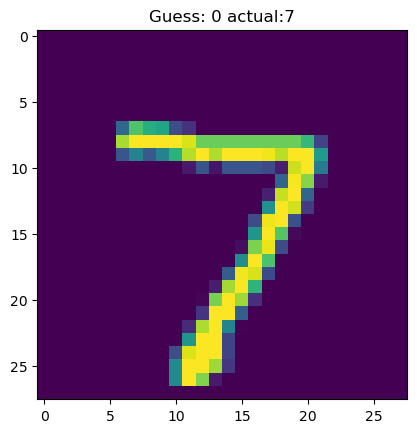

[0.69880788 0.96341388 0.67455127 0.01811385 0.78166049 0.39141505
 0.40194801 0.26462486 0.23205534 0.90011224] 1


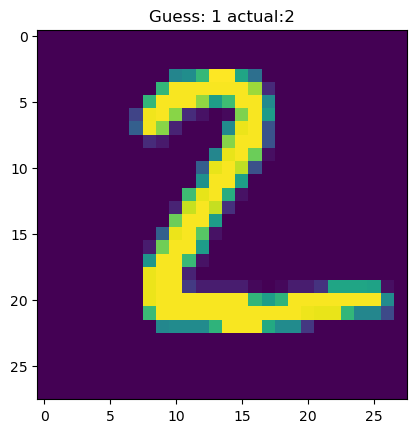

[0.99399794 0.90617411 0.63838616 0.06849872 0.93075068 0.17905921
 0.00705406 0.80091455 0.498784   0.85010879] 0


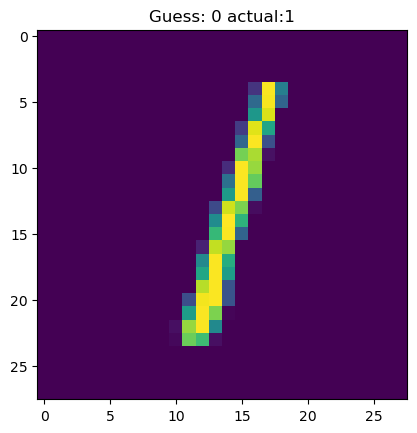

[0.9576065  0.97745502 0.53993975 0.04027537 0.89660181 0.14709535
 0.0178275  0.53886364 0.31618075 0.49469032] 1


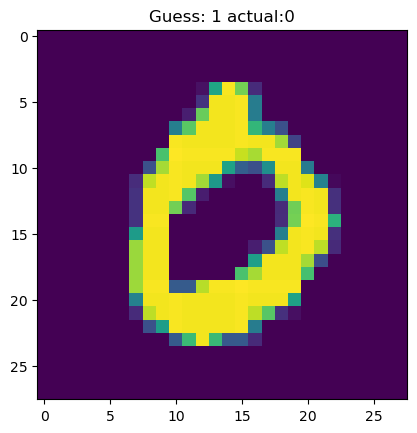

[0.99263705 0.94597033 0.2437228  0.38449753 0.56288308 0.10508158
 0.0448243  0.03381885 0.09666109 0.93782563] 0


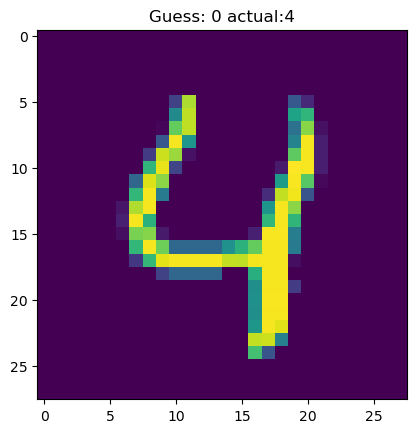

[0.99277004 0.93319906 0.70860005 0.03319265 0.96674058 0.19637836
 0.00578231 0.85620518 0.29277793 0.87656441] 0


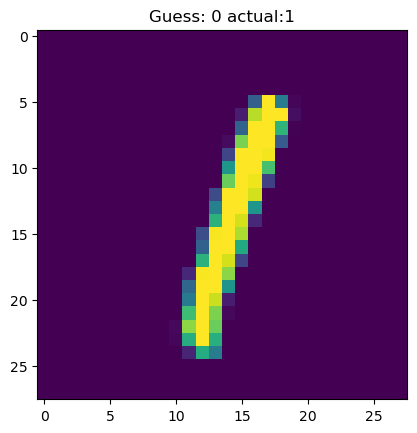

[0.98985115 0.95899308 0.30953387 0.25667101 0.88196178 0.30301352
 0.04537404 0.23697303 0.14920206 0.51879804] 0


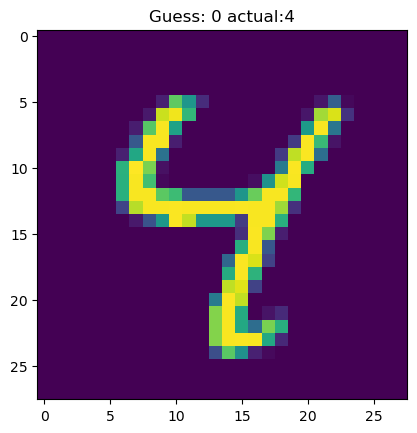

[0.97374666 0.9869465  0.38608903 0.09970258 0.95154859 0.24302074
 0.01170345 0.61931869 0.07168084 0.33203683] 1


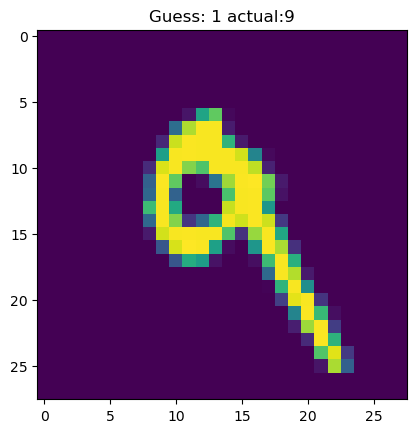

[0.98949223 0.96736284 0.73029627 0.03852248 0.90803408 0.1427229
 0.01954119 0.6188708  0.06389348 0.97955373] 0


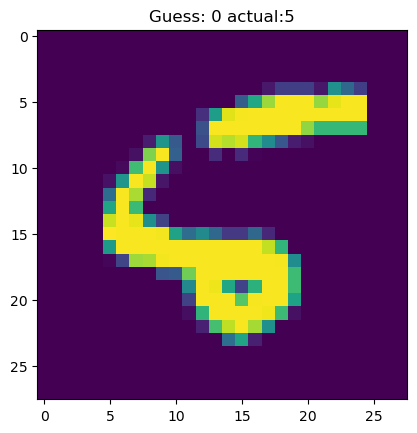

[0.98773727 0.96443324 0.26037875 0.02361908 0.95461151 0.26191666
 0.01404892 0.65742715 0.10406195 0.81123696] 0


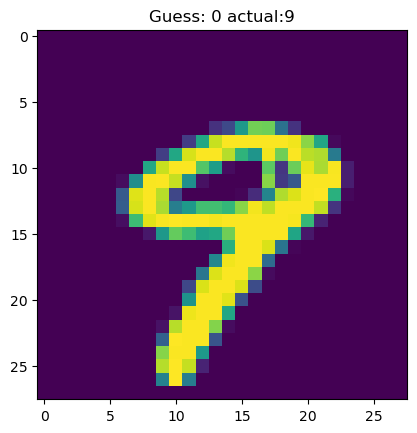

In [141]:
aL_untrained = nn_mnist.forward_prop_set(x_test)
print('For an untrained network')
print('Test set probability :', 100*(np.floor( aL_untrained.T /  aL_untrained.max(axis = 1)).T * y_test).sum() / len(aL_untrained))
for i in range(10):
    plt.imshow(x_test[i].reshape(im_width, im_height))
    print(aL_untrained[i],aL_untrained[i].argmax() )
    plt.title('Guess: ' + str(aL_untrained[i].argmax())+ ' actual:'+ str(y_test[i].argmax()))
    plt.show()

In [142]:
L_training, L_testing = nn_mnist.stochastic_training(x_train[:10000], y_train[:10000],x_test[:1000], y_test[:1000], 30, 100)

Batch size =  100
n_batches =  100
Epoch 0 L_testing : 0.182075019843775
Train prob: 65.21 %. Test prob: 63.1 %
Epoch 1 L_testing : 0.030367972640013487
Train prob: 71.5 %. Test prob: 69.0 %
Epoch 2 L_testing : 0.026486199486952484
Train prob: 75.89 %. Test prob: 69.9 %
Epoch 3 L_testing : 0.02414203316707085
Train prob: 77.99 %. Test prob: 73.0 %
Epoch 4 L_testing : 0.022422352003636865
Train prob: 79.53 %. Test prob: 74.0 %
Epoch 5 L_testing : 0.021329699387539727
Train prob: 80.39 %. Test prob: 75.4 %
Epoch 6 L_testing : 0.020312156022196045
Train prob: 80.97 %. Test prob: 75.7 %
Epoch 7 L_testing : 0.019646949271807955
Train prob: 81.96 %. Test prob: 76.6 %
Epoch 8 L_testing : 0.019045921835611875
Train prob: 82.39 %. Test prob: 77.2 %
Epoch 9 L_testing : 0.018332528016862023
Train prob: 82.65 %. Test prob: 78.1 %
Epoch 10 L_testing : 0.017941470602156954
Train prob: 83.17 %. Test prob: 78.2 %
Epoch 11 L_testing : 0.017427208615912893
Train prob: 82.77 %. Test prob: 77.9 %
Epoch 12

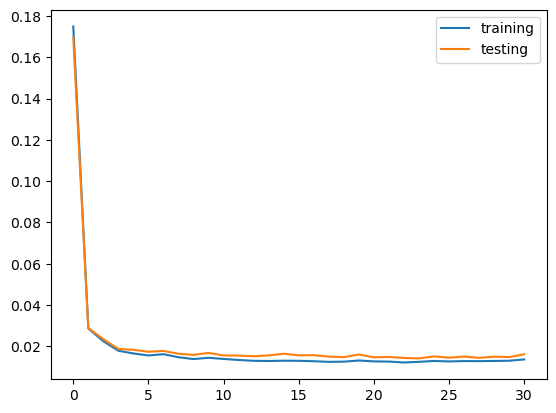

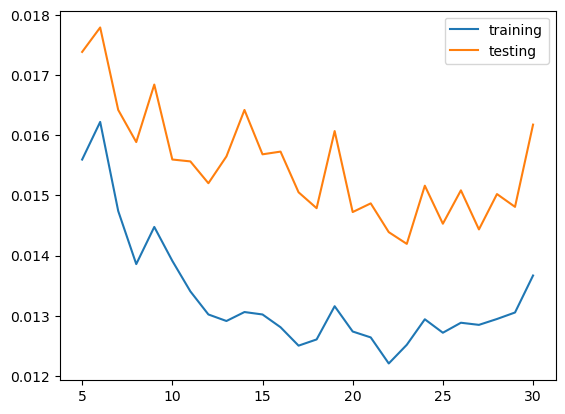

In [24]:
plt.plot(L_training, label = 'training')
plt.plot(L_testing, label = 'testing')
plt.legend()
plt.show()
plt.plot(np.arange(5,len(L_training)),L_training[5:], label = 'training')
plt.plot( np.arange(5,len(L_testing)),L_testing[5:],label = 'testing')
plt.legend()
plt.show()

C:\Users\davem\AppData\Local\Temp\ipykernel_1196\4017307503.py:20: RuntimeWarning: overflow encountered in exp
  a_layer = 1 / (1 + np.exp(-self.calc_z(a , layer)))


For a trained network
Test set probability : 81.47 %
[3.05835263e-04 1.10282999e-04 2.34164394e-04 1.12300426e-03
 4.88389521e-08 3.33545564e-04 9.33417587e-09 9.99871061e-01
 3.89665878e-06 1.59991281e-04] 7


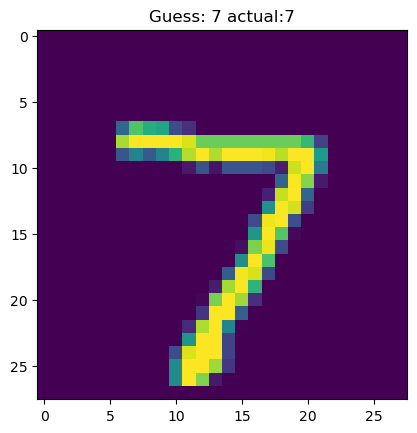

[3.81875456e-03 6.18650130e-05 1.03623532e-01 8.84143392e-04
 1.88855758e-10 8.25369408e-02 3.07059669e-02 4.48449798e-10
 5.21726836e-06 8.48327996e-08] 2


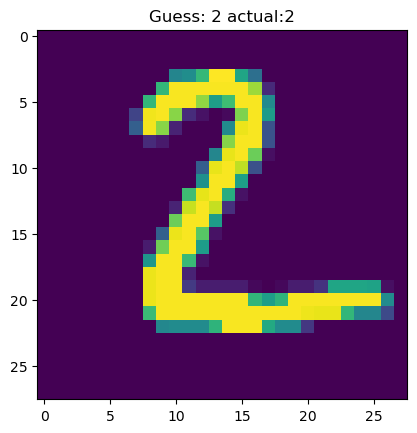

[4.58779335e-08 9.99003678e-01 1.30824671e-03 4.08077915e-04
 4.36308851e-09 5.62157064e-04 4.52915546e-05 1.40458401e-05
 1.00430206e-06 5.26153139e-08] 1


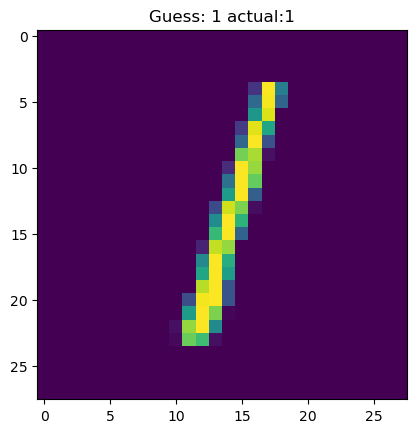

[8.77004403e-01 5.46410361e-07 4.36814853e-04 2.30539874e-02
 1.87527450e-08 2.12863568e-01 1.00634390e-01 8.00740330e-05
 5.49958207e-04 8.16387752e-06] 0


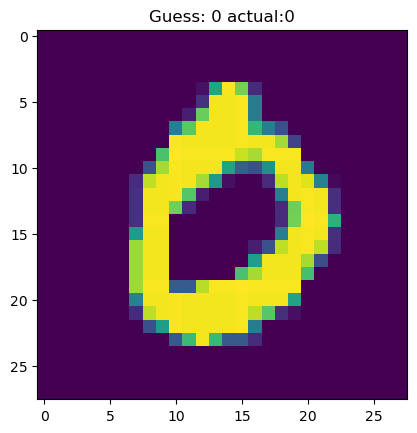

[6.84997337e-05 2.66645020e-05 1.71693896e-03 4.82939899e-03
 7.87100783e-01 4.63027633e-02 1.76212621e-03 2.19894652e-02
 6.81342108e-03 3.14183738e-01] 4


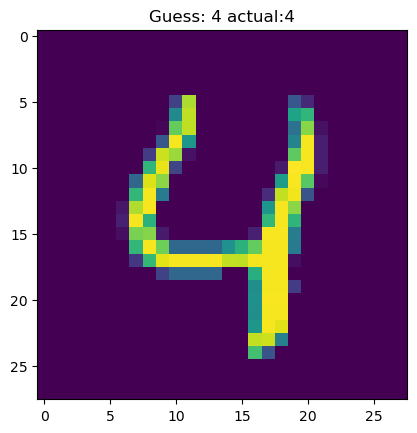

[3.47688187e-08 9.50850217e-01 2.91486545e-03 2.73455547e-02
 1.43457011e-07 6.46871627e-04 1.25023047e-06 2.01928886e-03
 1.20137024e-04 7.96300388e-06] 1


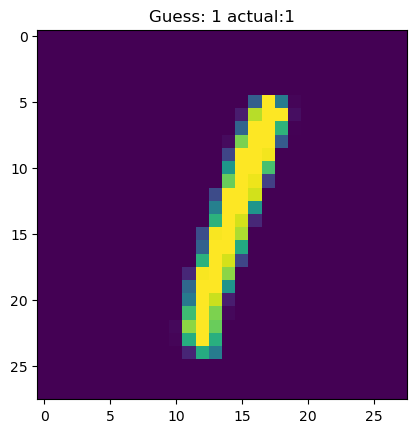

[1.98122675e-05 6.54232689e-06 6.90582032e-05 6.20284671e-03
 6.46013813e-01 5.97256528e-02 2.58664506e-04 2.67809940e-01
 1.49256539e-03 1.11358520e-01] 4


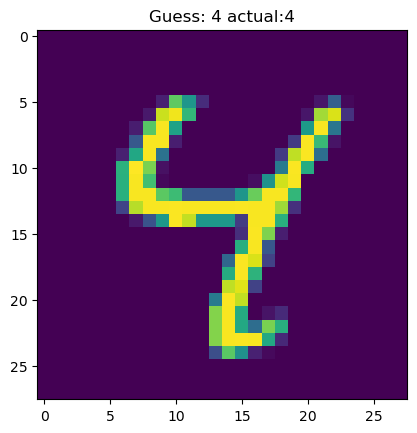

[6.84997337e-05 2.66645020e-05 1.71693896e-03 4.82939899e-03
 7.87100783e-01 4.63027633e-02 1.76212621e-03 2.19894652e-02
 6.81342108e-03 3.14183738e-01] 4


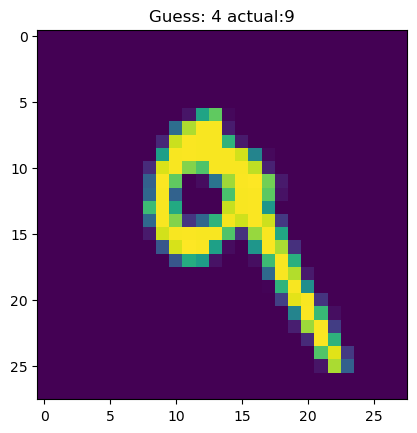

[2.48348511e-03 1.14972894e-04 5.77945802e-01 1.58259081e-04
 3.40096022e-01 1.81724335e-03 1.57844649e-02 1.38479809e-03
 8.49500585e-03 4.84426325e-02] 2


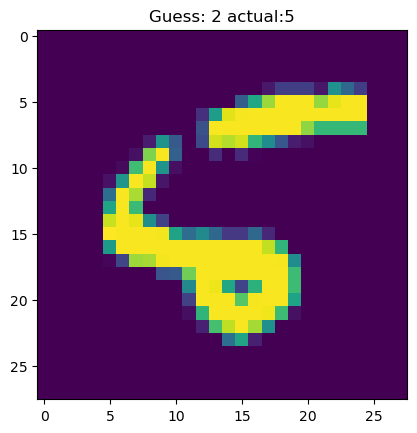

[1.92166186e-05 3.91923368e-04 1.11984409e-04 6.25153310e-04
 1.90106858e-01 3.78383039e-03 5.29408785e-05 7.19690523e-02
 2.35487588e-04 8.05401886e-01] 9


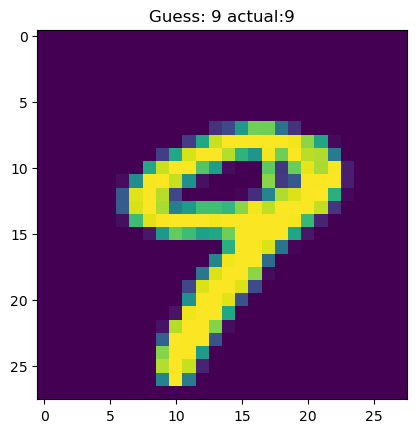

[9.11643446e-01 2.63731795e-06 2.98599394e-03 1.28543766e-03
 4.31132940e-06 1.20038867e-01 3.17512454e-05 4.49070315e-05
 2.34729641e-03 1.03080799e-05] 0


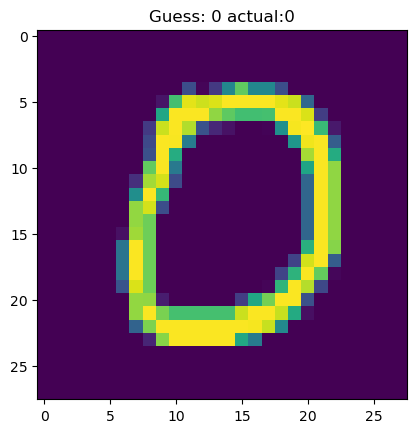

[1.90522326e-03 1.52653742e-05 6.08390630e-03 6.37547266e-04
 6.69140438e-01 2.64830463e-02 3.36609268e-01 2.21829118e-03
 4.49860543e-02 8.63991234e-03] 4


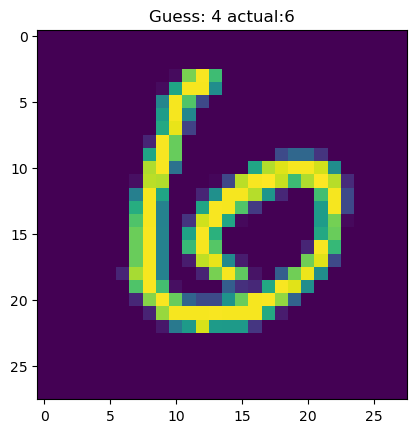

[6.15340276e-04 3.99907641e-04 1.81994483e-04 7.94972312e-03
 9.48462490e-04 9.65793523e-03 1.32599287e-06 1.47183909e-01
 2.75187176e-03 9.16012058e-01] 9


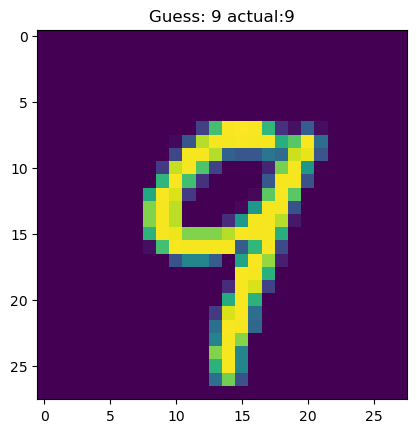

[9.57980760e-01 4.06788453e-06 5.23167296e-02 8.34958187e-03
 1.48461260e-05 8.80550109e-03 1.84189025e-05 1.22336664e-02
 5.02697854e-03 2.03474856e-03] 0


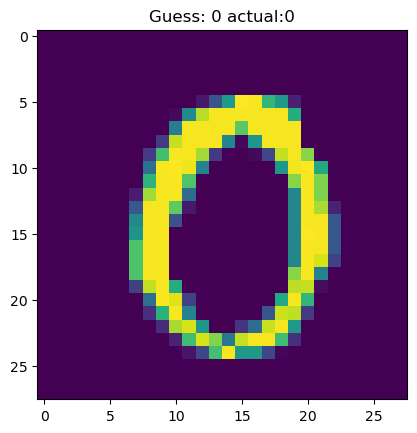

[2.23746329e-08 9.82447274e-01 4.57460433e-03 2.35341076e-02
 1.16828605e-09 6.77376172e-04 1.02314875e-04 1.88724362e-04
 1.40730471e-05 1.60764233e-06] 1


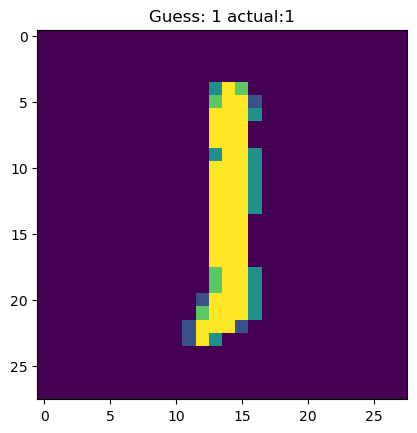

[1.90112404e-03 2.03235752e-03 2.01404457e-03 1.62528650e-01
 2.25055898e-05 1.44944658e-01 8.58757338e-05 2.86528078e-04
 1.59132803e-01 4.24006834e-06] 3


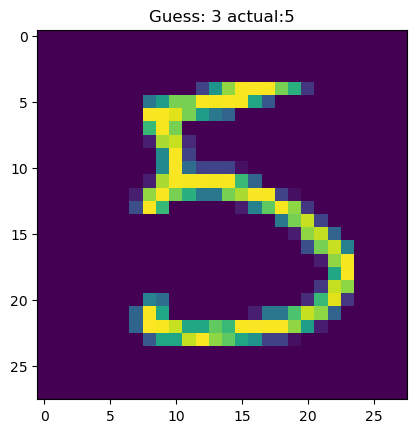

[2.19009922e-03 2.72079145e-05 2.78753239e-03 5.85279332e-02
 1.47323727e-02 1.10840175e-01 4.42090718e-05 4.76527626e-02
 7.43904002e-02 5.46941251e-01] 9


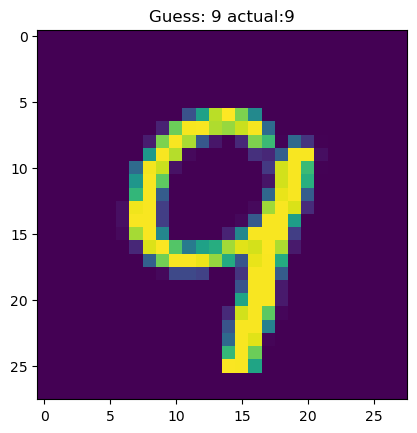

[1.26645706e-02 1.15499796e-06 4.37774174e-04 1.17726284e-02
 8.25166631e-08 1.11656797e-02 2.40706962e-07 9.98534450e-01
 2.49517009e-05 9.50307908e-06] 7


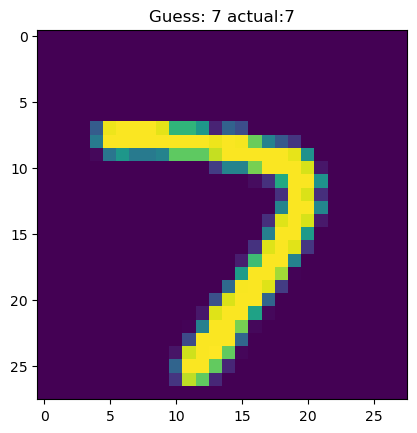

[1.11449739e-04 3.87944383e-02 2.23041668e-01 2.63617216e-01
 9.50566372e-06 1.58490655e-02 6.43474887e-02 5.56513375e-04
 1.72126983e-01 5.94179621e-03] 3


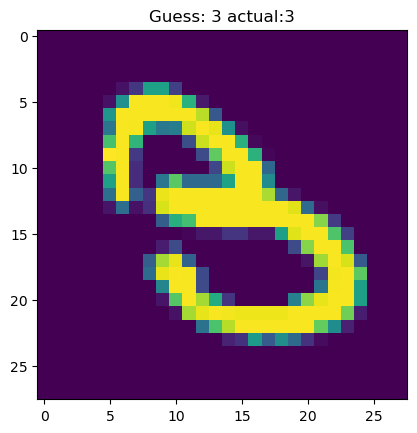

[3.25144896e-04 9.45863332e-07 4.88810208e-04 3.71596023e-03
 8.60976238e-01 6.12656681e-02 8.65870930e-03 5.74103912e-03
 1.84616783e-03 3.33682214e-02] 4


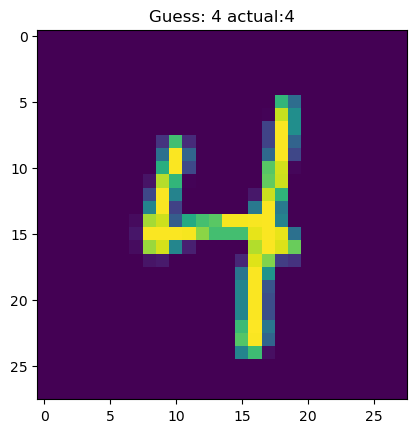

In [29]:
aL_test = nn_mnist.forward_prop_set(x_test)
print('For a trained network')
print('Test set probability :', 100*(np.floor( aL_test.T /  aL_test.max(axis = 1)).T * y_test).sum() / len(aL_test), '%')
for i in range(20):
    plt.imshow(x_test[i].reshape(im_width, im_height))
    print(aL_test[i],aL_test[i].argmax() )
    plt.title('Guess: ' + str(aL_test[i].argmax())+  ' actual:'+ str(y_test[i].argmax()))
    plt.show()


In [186]:
nn_mnist_2 = neural_net(1, [im_width * im_height,25,10], ['Input', 'tanh', 'sigmoid'],'', 0.01)

In [187]:
L_training, L_testing = nn_mnist_2.stochastic_training(x_train[:10000], y_train[:10000],x_test[:1000], y_test[:1000], 20, 100)

Batch size =  100
n_batches =  100
Epoch 0 L_testing : 0.19707440014961544
Train prob: 64.51 %. Test prob: 61.1 %
Epoch 1 L_testing : 0.02917174765170147
Train prob: 73.13 %. Test prob: 68.7 %
Epoch 2 L_testing : 0.024563679016163038
Train prob: 77.34 %. Test prob: 74.1 %
Epoch 3 L_testing : 0.021983644330522554
Train prob: 80.19 %. Test prob: 76.0 %
Epoch 4 L_testing : 0.019874225385352384
Train prob: 81.98 %. Test prob: 78.9 %
Epoch 5 L_testing : 0.018151890532734305
Train prob: 82.65 %. Test prob: 79.9 %
Epoch 6 L_testing : 0.0169801701910863
Train prob: 83.28 %. Test prob: 80.1 %
Epoch 7 L_testing : 0.016434111619881144
Train prob: 83.66 %. Test prob: 81.5 %
Epoch 8 L_testing : 0.015925182317910593
Train prob: 84.14 %. Test prob: 81.5 %
Epoch 9 L_testing : 0.015493665208768121
Train prob: 84.53 %. Test prob: 82.0 %
Epoch 10 L_testing : 0.015059864655396864
Train prob: 85.15 %. Test prob: 82.4 %
Epoch 11 L_testing : 0.01481413597838555
Train prob: 85.5 %. Test prob: 82.9 %
Epoch 12 

For a trained network
Test set probability : 84.65 %
[6.54524261e-04 9.73413462e-05 9.78966447e-04 1.04422131e-02
 2.29678695e-03 1.51589681e-03 1.22634830e-06 9.97138708e-01
 1.20340048e-05 1.25174327e-02] 7


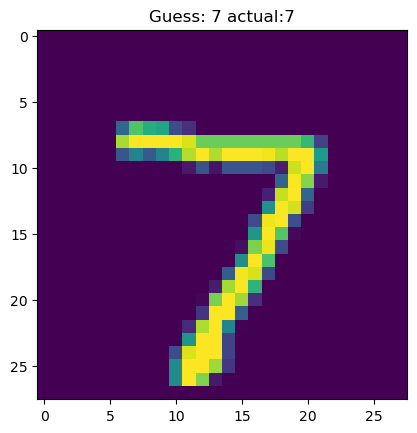

[3.36322142e-02 4.38715070e-04 4.89394124e-01 3.59895133e-03
 4.77607523e-06 1.43727623e-01 3.78072140e-01 1.12153918e-04
 7.03712449e-03 2.72106624e-04] 2


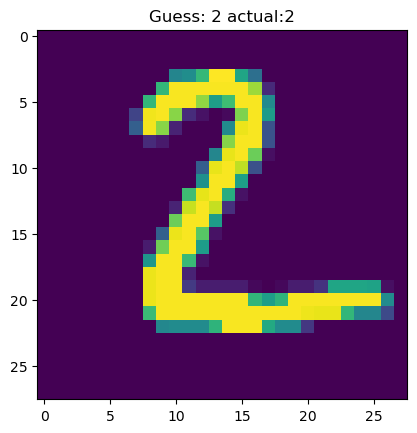

[7.19234416e-06 9.73900926e-01 1.24647726e-02 1.13021651e-02
 2.11671795e-04 4.44039085e-03 2.58130042e-02 2.08568512e-03
 7.87456776e-03 6.07995687e-04] 1


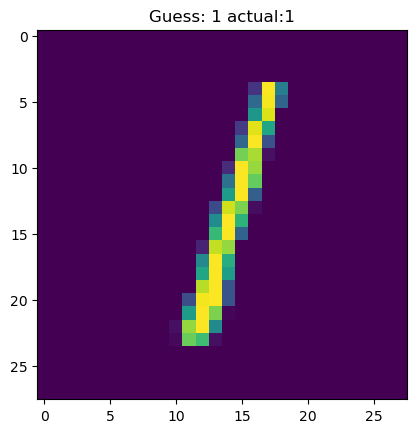

[9.04368877e-01 2.71375811e-05 6.19453705e-03 3.89017216e-03
 4.79838914e-05 3.27453357e-03 4.59680975e-03 1.28809717e-01
 8.71777489e-03 6.90243152e-04] 0


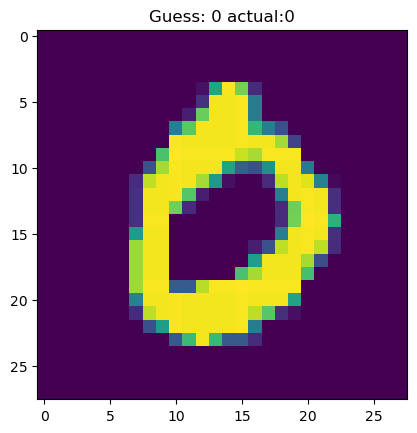

[1.83409908e-03 1.58191858e-06 2.28144359e-02 1.02175074e-03
 7.54107526e-01 3.65484823e-03 2.27030930e-03 8.47705856e-03
 1.48124418e-02 1.10597246e-01] 4


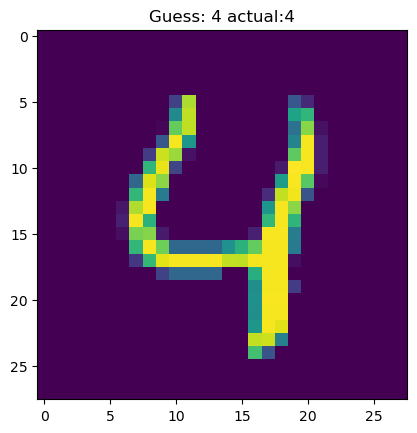

[5.47717589e-06 9.63866284e-01 1.65793561e-02 2.46158218e-02
 3.26469696e-04 2.79683177e-03 1.06444963e-02 2.59747445e-03
 4.05464824e-03 1.10830048e-03] 1


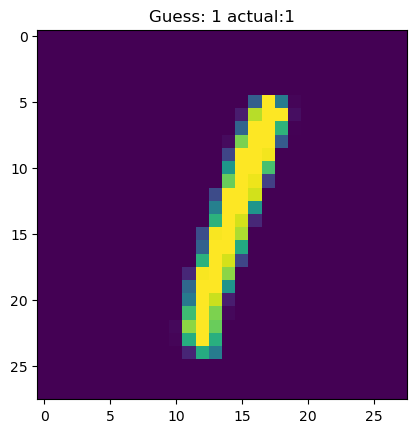

[6.58081006e-06 2.11125959e-04 5.36297900e-04 5.35404441e-03
 8.37081293e-01 2.72251927e-02 6.87579008e-04 1.05719296e-02
 5.51261726e-02 1.08451748e-01] 4


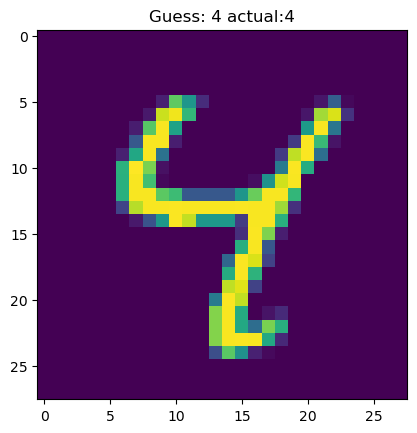

[3.03290917e-05 1.68112684e-03 1.00502387e-04 1.30243666e-02
 1.67557891e-02 6.23008362e-02 2.13229357e-04 4.82244470e-03
 7.90793640e-03 9.21002625e-01] 9


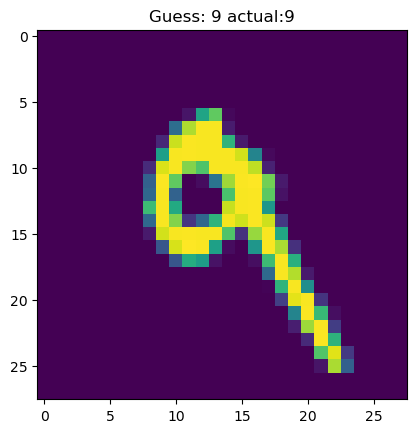

[1.01754516e-03 1.45201881e-04 1.87968174e-02 1.24427023e-06
 1.05620461e-01 7.70450408e-03 8.33931115e-01 3.98589561e-04
 3.24126525e-04 2.44230819e-03] 6


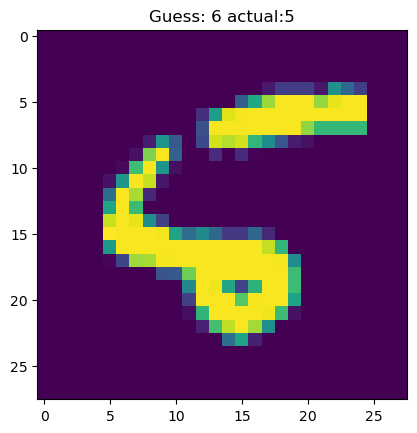

[4.91907715e-05 2.20374228e-03 4.35408723e-05 2.82034591e-04
 9.52666837e-02 8.53607999e-03 7.55650907e-05 5.78451994e-02
 3.12139204e-03 9.38069753e-01] 9


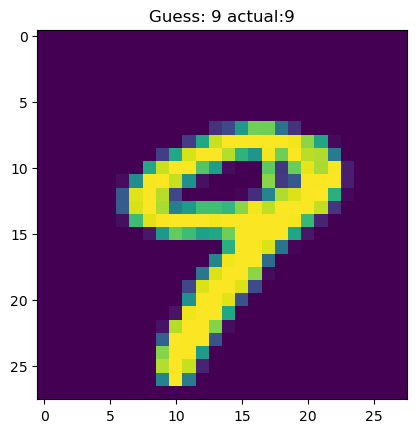

[6.33082823e-01 2.78569523e-06 1.40451424e-02 8.59724749e-02
 2.68570328e-04 2.70690892e-01 6.71190271e-03 1.00409187e-04
 3.54657026e-03 5.88125643e-04] 0


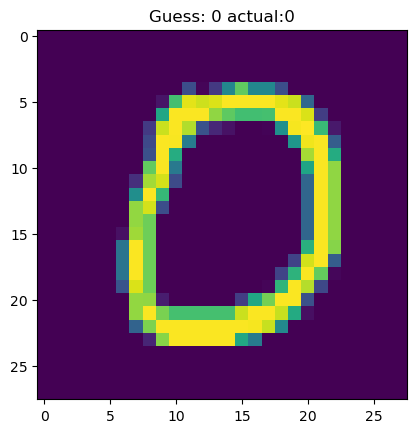

[5.31565813e-04 1.20614495e-01 6.81882616e-02 5.36181700e-03
 1.46684184e-03 3.30883265e-04 5.64880048e-01 1.10938945e-04
 2.18073042e-02 4.67836560e-03] 6


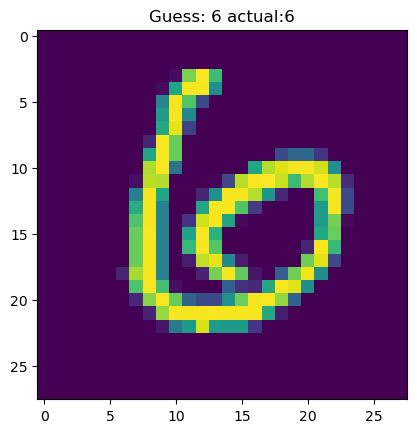

[7.35359606e-03 4.93889033e-06 7.24912134e-03 2.67650536e-04
 2.33689613e-02 4.38774588e-03 7.44718935e-05 5.37824115e-02
 2.47474957e-03 9.39109771e-01] 9


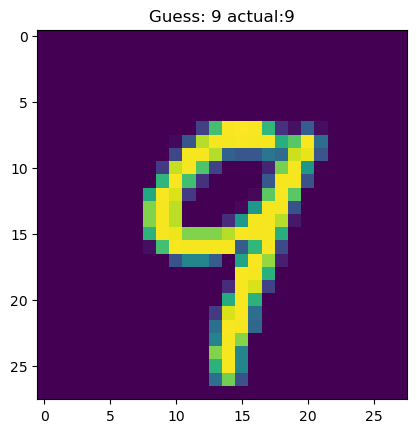

[9.13704407e-01 1.64581657e-05 5.00231387e-03 6.92204903e-03
 2.99300343e-04 6.43918141e-03 1.59245675e-03 6.78724642e-03
 7.39142693e-03 8.17942035e-03] 0


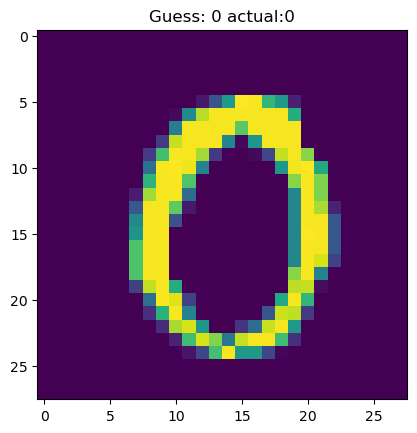

[7.24085852e-06 9.72740211e-01 1.28513745e-02 1.15995019e-02
 2.05624197e-04 4.50982647e-03 2.50688465e-02 2.11550789e-03
 8.00860781e-03 6.15840248e-04] 1


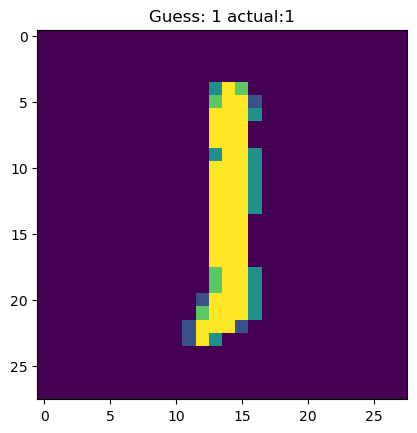

[7.45888559e-02 2.12334917e-03 6.60146148e-03 1.52375817e-01
 1.96880720e-04 2.76952056e-01 2.96372196e-03 1.15190858e-04
 9.86915865e-02 4.78189657e-04] 5


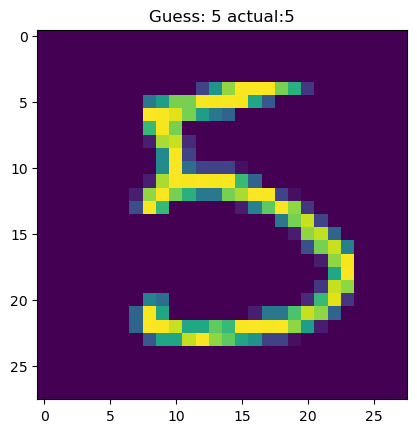

[1.87956511e-02 4.58203062e-06 2.04273224e-02 1.59622005e-03
 2.24096910e-02 2.16912684e-03 3.85546104e-04 1.90193680e-01
 1.48765843e-02 3.96280412e-01] 9


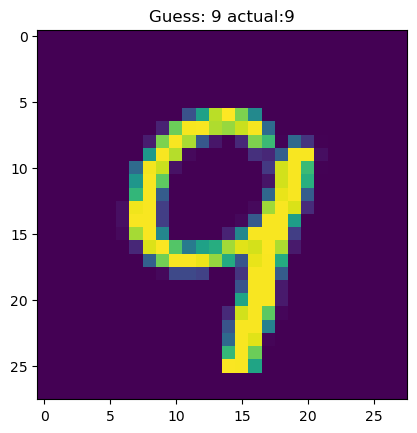

[3.61912420e-03 3.09179007e-04 2.22904184e-04 4.77633302e-02
 6.68526689e-04 1.54298523e-03 1.27120464e-05 9.78970822e-01
 3.51738939e-06 1.48479811e-02] 7


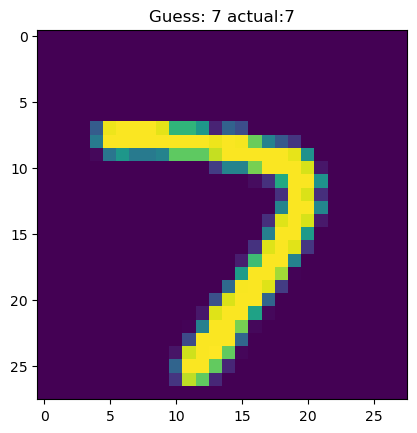

[5.13665753e-02 1.92790935e-04 1.43369635e-02 3.92629721e-01
 3.97747657e-04 7.77188477e-02 7.89372307e-03 2.20896730e-04
 8.38602421e-02 2.50276102e-03] 3


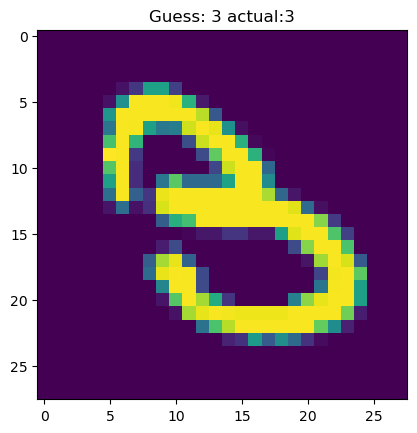

[1.62654816e-06 1.96902976e-04 3.52011029e-04 2.62722682e-04
 9.25418557e-01 9.62105793e-03 1.54334003e-03 1.05813078e-02
 3.60293639e-04 1.38609336e-01] 4


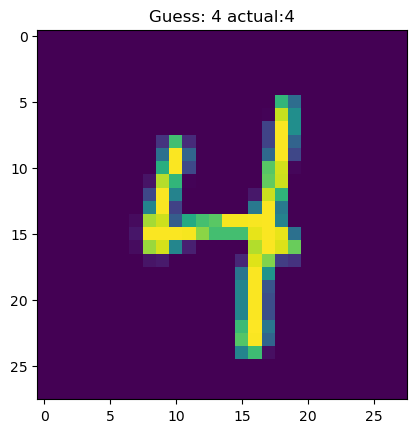

In [188]:
aL_test = nn_mnist_2.forward_prop_set(x_test)
print('For a trained network')
print('Test set probability :', 100*(np.floor( aL_test.T /  aL_test.max(axis = 1)).T * y_test).sum() / len(aL_test), '%')
for i in range(20):
    plt.imshow(x_test[i].reshape(im_width, im_height))
    print(aL_test[i],aL_test[i].argmax() )
    plt.title('Guess: ' + str(aL_test[i].argmax())+  ' actual:'+ str(y_test[i].argmax()))
    plt.show()

In [183]:
nn_mnist_3 = neural_net(1, [im_width * im_height,25,10], ['Input', 'tanh', 'sigmoid'],'cross entropy', 0)

In [184]:
L_training, L_testing = nn_mnist_3.stochastic_training(x_train[:10000], y_train[:10000],x_test[:1000], y_test[:1000], 20, 100)

Batch size =  100
n_batches =  100
Epoch 0 L_testing : 1.0899382278762109
Train prob: 84.31 %. Test prob: 82.4 %
Epoch 1 L_testing : 0.11020939210761892
Train prob: 85.31 %. Test prob: 81.8 %
Epoch 2 L_testing : 0.10726078774791299
Train prob: 86.23 %. Test prob: 82.6 %
Epoch 3 L_testing : 0.10508389831614161
Train prob: 85.03 %. Test prob: 82.0 %
Epoch 4 L_testing : 0.10638554059818026
Train prob: 85.07 %. Test prob: 83.1 %
Epoch 5 L_testing : 0.10215804876211246
Train prob: 85.91 %. Test prob: 83.7 %
Epoch 6 L_testing : 0.10570353166249313
Train prob: 84.73 %. Test prob: 84.1 %
Epoch 7 L_testing : 0.10565265265116695
Train prob: 85.02 %. Test prob: 83.9 %
Epoch 8 L_testing : 0.10392909169833697
Train prob: 85.06 %. Test prob: 82.9 %
Epoch 9 L_testing : 0.10529430951477853
Train prob: 84.5 %. Test prob: 82.3 %
Epoch 10 L_testing : 0.10554054296503589
Train prob: 85.38 %. Test prob: 83.3 %
Epoch 11 L_testing : 0.10392213276434129
Train prob: 85.18 %. Test prob: 81.6 %
Epoch 12 L_testin

For a trained network
Test set probability : 81.54 %
[2.72293524e-04 1.01527803e-04 1.13951981e-03 4.47649537e-04
 3.87507267e-04 3.80907501e-03 1.36610766e-08 9.93526993e-01
 4.24195368e-04 1.46481111e-02] 7


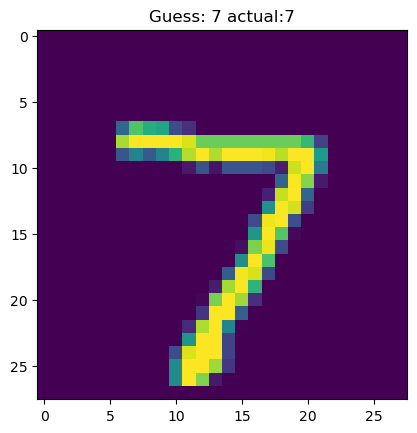

[8.88516474e-02 2.78756448e-03 3.25909654e-01 8.01760196e-02
 7.80236060e-06 5.18111163e-03 4.38391531e-03 1.63447915e-04
 6.12155090e-03 1.78500233e-06] 2


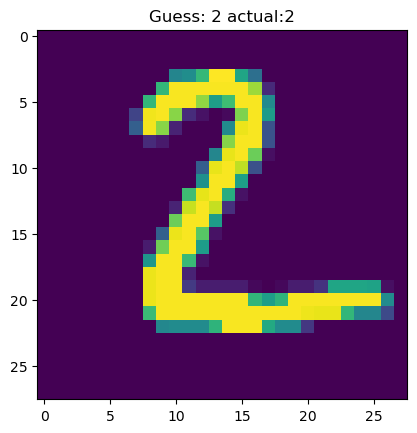

[9.02914573e-11 9.54748052e-01 3.40504042e-03 4.12318629e-04
 3.28873465e-03 8.43854303e-04 2.11499620e-03 4.30603439e-03
 2.78003632e-03 3.50276522e-03] 1


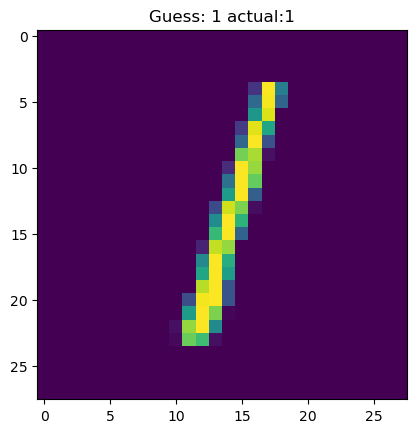

[9.30128782e-01 1.02600423e-06 2.84788583e-03 2.02891886e-02
 7.65632961e-06 1.56751073e-02 2.44526835e-03 1.18541880e-02
 2.08975221e-03 3.10175668e-03] 0


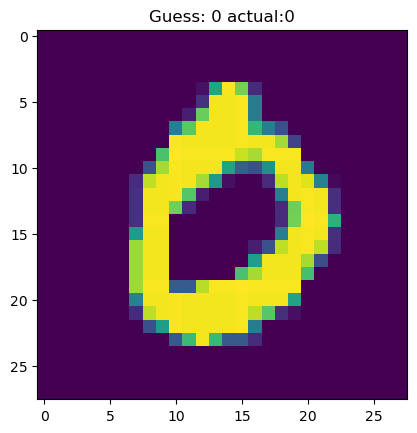

[1.05776673e-04 2.64894719e-07 2.76324273e-03 1.18932096e-04
 9.61508638e-01 4.47544582e-03 3.78890963e-03 2.28826436e-03
 2.72021239e-02 4.13503303e-03] 4


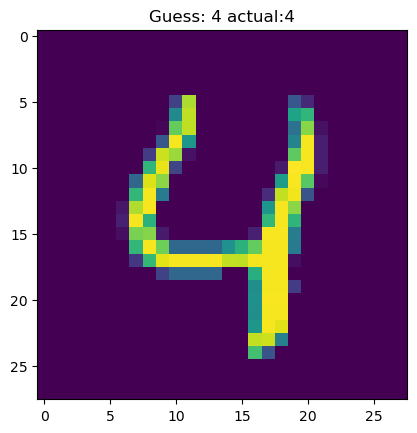

[1.34013961e-08 9.95779960e-01 5.98374978e-04 2.43791034e-03
 3.42594672e-04 2.56412075e-03 1.44009594e-04 1.48666593e-03
 3.24179963e-02 5.58090647e-03] 1


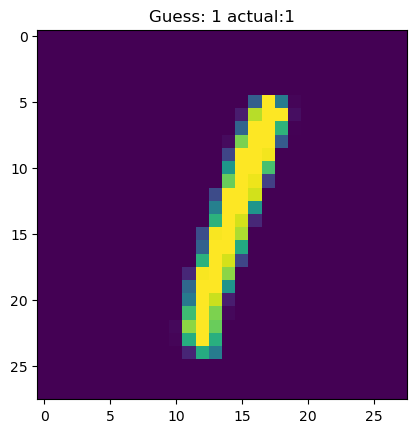

[2.56988745e-05 1.95043833e-05 3.88957262e-07 4.27575982e-04
 9.17648884e-01 2.27167112e-02 5.61739198e-04 3.02511226e-02
 3.84179808e-03 7.04618551e-03] 4


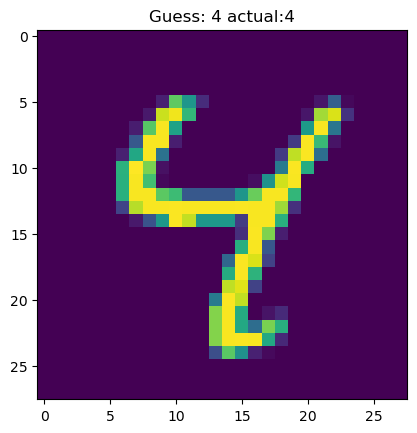

[1.52729042e-08 6.89219398e-02 1.52481296e-05 1.42673389e-03
 1.09287949e-03 6.60568766e-03 2.16332827e-03 2.84870950e-02
 4.19459311e-03 6.83499613e-01] 9


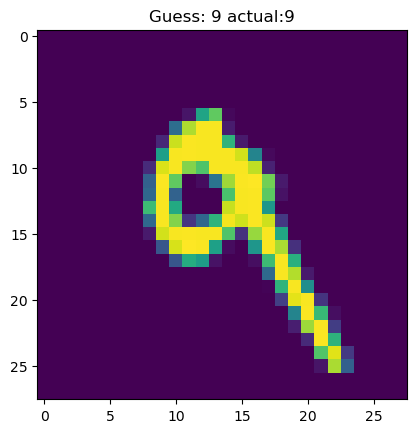

[1.44542461e-01 1.45765193e-07 6.04709647e-03 2.35113887e-06
 1.56053680e-01 6.48398383e-03 8.93536254e-02 1.07872342e-03
 1.66100794e-02 1.77504892e-04] 4


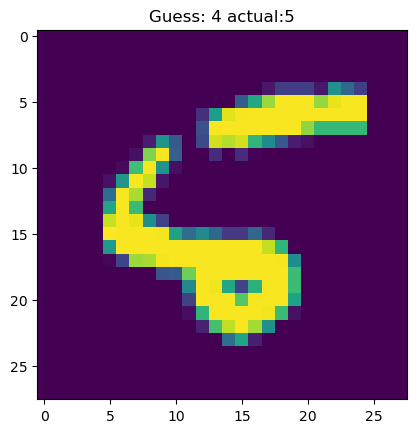

[3.93157524e-04 1.82940299e-04 4.04649050e-06 5.62447709e-05
 9.87365035e-02 7.01952293e-04 6.02701070e-05 8.36222637e-01
 1.68818565e-03 5.43583511e-01] 7


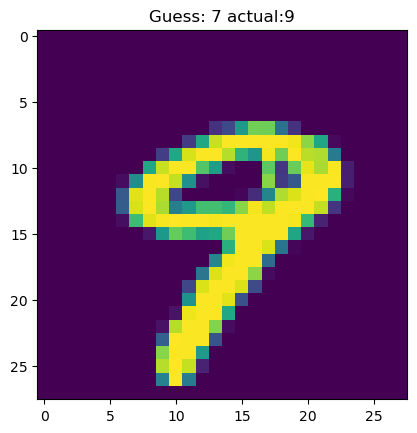

[4.23981540e-01 4.95711190e-05 2.41385498e-01 3.58131523e-02
 1.77935805e-04 1.25163154e-02 6.40674249e-05 4.51494697e-04
 2.80388958e-02 3.49122210e-06] 0


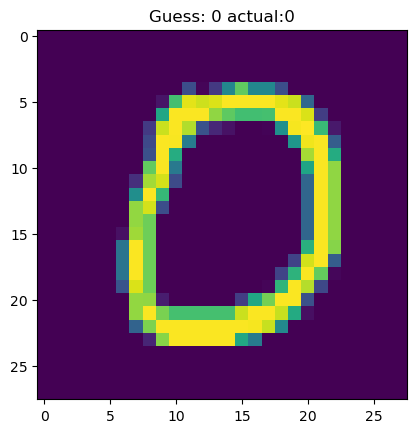

[6.08147820e-04 3.14940416e-05 7.16363344e-01 1.00500073e-03
 2.21213271e-02 5.97953571e-03 8.36428170e-02 3.60192583e-05
 2.19970362e-01 5.35574339e-05] 2


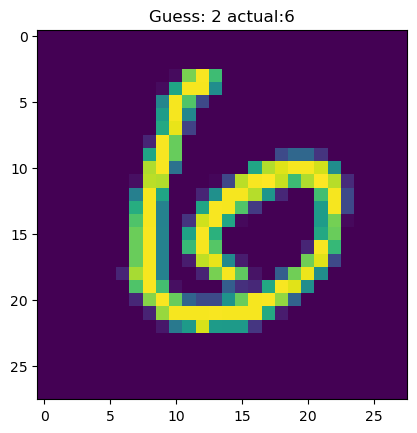

[5.46920838e-04 1.11405823e-06 6.17453127e-03 8.18534141e-05
 2.04862367e-01 2.63870116e-04 1.21041239e-03 4.10479905e-02
 4.71738281e-03 8.20806944e-01] 9


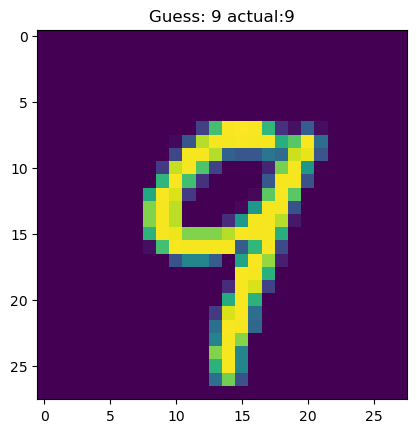

[4.36463871e-01 7.58431197e-05 1.83910206e-02 1.29869630e-05
 1.43762381e-03 7.05055961e-03 9.90305014e-05 1.48884403e-03
 1.36996963e-01 4.24695308e-02] 0


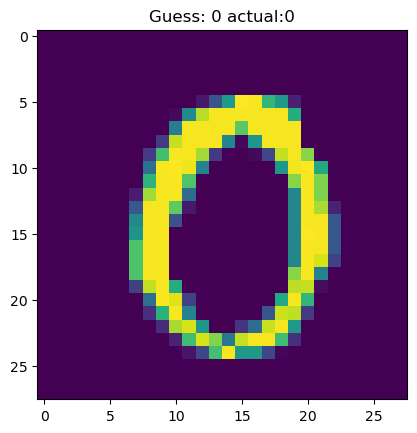

[6.07139780e-09 9.02929077e-01 2.15460262e-03 1.12753576e-02
 8.70077066e-04 4.65202555e-03 3.35787228e-05 4.58739134e-03
 1.70947178e-01 1.75216321e-02] 1


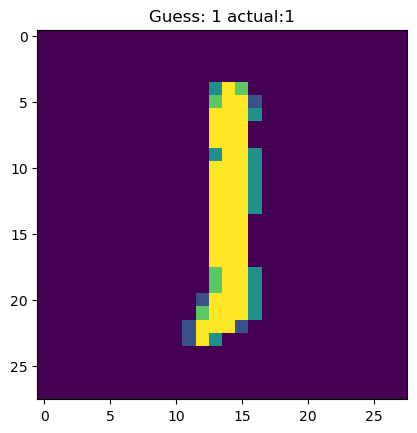

[5.98695291e-03 8.12590394e-05 1.49629612e-01 4.40142223e-01
 9.90889154e-04 1.57438763e-01 1.74580942e-04 1.46797178e-05
 1.07158774e-01 7.51019546e-07] 3


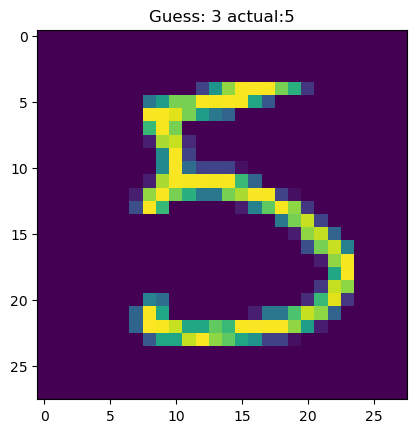

[5.48999320e-04 1.11341895e-06 6.18116663e-03 8.17887774e-05
 2.04829802e-01 2.63451655e-04 1.21065991e-03 4.11543598e-02
 4.71305312e-03 8.20751511e-01] 9


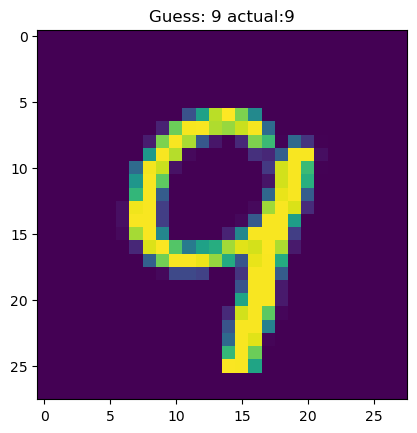

[3.37426072e-05 9.41965048e-05 1.73010899e-04 8.78788252e-03
 5.25822882e-05 1.50599566e-02 1.27175457e-07 9.84734519e-01
 7.94505725e-04 6.09445204e-03] 7


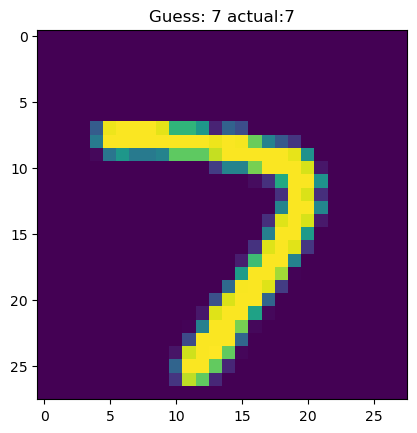

[3.50947725e-04 9.54122928e-04 1.29034109e-02 6.02852904e-02
 7.04436067e-04 7.58753578e-02 1.03363324e-01 2.12830018e-07
 1.37151559e-01 8.10356271e-04] 8


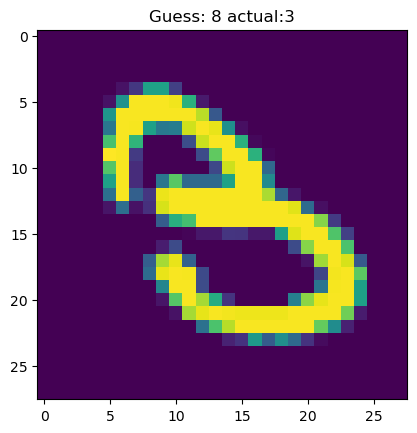

[2.72549921e-08 9.99800149e-05 3.52580676e-04 4.96535634e-03
 9.77475008e-01 7.09983902e-03 1.37306828e-04 2.49853980e-03
 2.23032687e-03 1.75355823e-03] 4


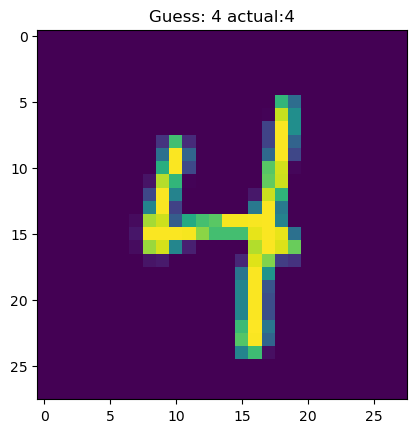

In [185]:
aL_test = nn_mnist_3.forward_prop_set(x_test)
print('For a trained network')
print('Test set probability :', 100*(np.floor( aL_test.T /  aL_test.max(axis = 1)).T * y_test).sum() / len(aL_test), '%')
for i in range(20):
    plt.imshow(x_test[i].reshape(im_width, im_height))
    print(aL_test[i],aL_test[i].argmax() )
    plt.title('Guess: ' + str(aL_test[i].argmax())+  ' actual:'+ str(y_test[i].argmax()))
    plt.show()

In [221]:
nn_mnist_4 = neural_net(0.1, [im_width * im_height,25,10], ['Input', 'tanh', 'softmax'],'log liklihood', 0)

In [223]:
L_training, L_testing = nn_mnist_4.stochastic_training(x_train, y_train,x_test, y_test, 20, 600, True)

Batch size =  100
n_batches =  600
Epoch 0 L_testing : 4.6005662711472155
Train prob: 84.405 %. Test prob: 85.14 %
Epoch 1 L_testing : 6.759574915947868
Train prob: 86.41666666666667 %. Test prob: 86.61 %
Epoch 2 L_testing : 7.026099573501983
Train prob: 86.91333333333333 %. Test prob: 86.88 %
Epoch 3 L_testing : 7.3224531894641105
Train prob: 87.485 %. Test prob: 87.58 %
Epoch 4 L_testing : 7.3905392540994574
Train prob: 87.87333333333333 %. Test prob: 88.28 %
Epoch 5 L_testing : 7.364237402677424
Train prob: 88.10166666666667 %. Test prob: 88.32 %
Epoch 6 L_testing : 7.507538548424083
Train prob: 88.19833333333334 %. Test prob: 88.4 %
Epoch 7 L_testing : 7.625968129236578
Train prob: 88.29 %. Test prob: 88.35 %
Epoch 8 L_testing : 7.739666880859664
Train prob: 88.51833333333333 %. Test prob: 88.55 %
Epoch 9 L_testing : 7.808917645694247
Train prob: 88.45833333333333 %. Test prob: 88.77 %
Epoch 10 L_testing : 7.770236842954294
Train prob: 88.475 %. Test prob: 88.78 %
Epoch 11 L_testin

For a trained network
Test set probability : 87.8 %
[1.26195294e-03 2.44263891e-06 1.30172191e-04 1.45886998e-04
 3.91887876e-07 4.30130772e-04 8.40917912e-09 9.97320443e-01
 2.50686430e-05 6.83502676e-04] 7


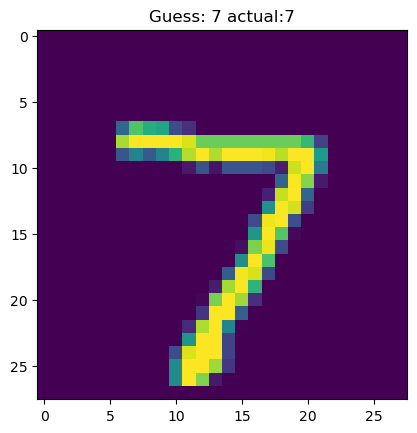

[2.00293209e-03 2.43366512e-02 5.71104725e-01 1.76289106e-01
 1.28771639e-06 2.10255878e-01 1.35295365e-02 2.65966742e-06
 2.47233315e-03 4.89043858e-06] 2


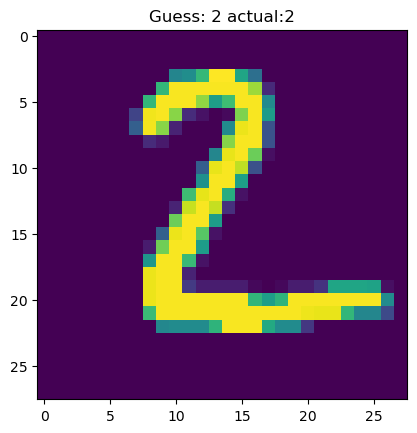

[5.33412908e-08 9.96304601e-01 1.66927562e-03 1.97266344e-04
 7.27731193e-06 1.67936752e-04 4.58855921e-04 6.42947704e-04
 5.30702992e-04 2.10826864e-05] 1


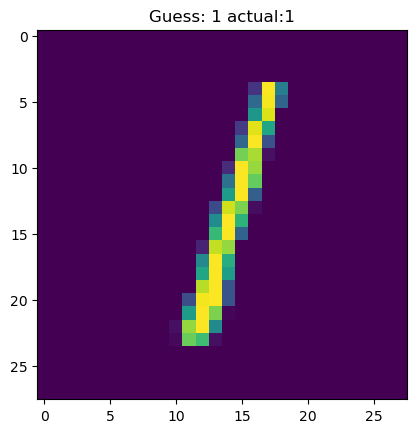

[9.95502458e-01 9.12263794e-08 2.35809013e-04 2.57223464e-05
 2.48344486e-07 4.13723260e-03 2.55093392e-05 4.63545672e-06
 5.89193661e-05 9.37399740e-06] 0


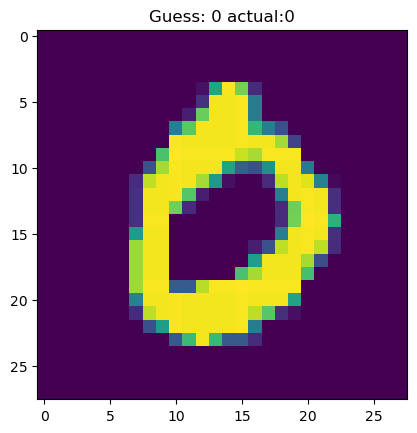

[4.03660614e-04 9.34893245e-09 5.88569188e-04 7.92956628e-06
 9.56752463e-01 3.96947639e-04 1.18961818e-03 6.91123653e-04
 4.67293472e-04 3.95023853e-02] 4


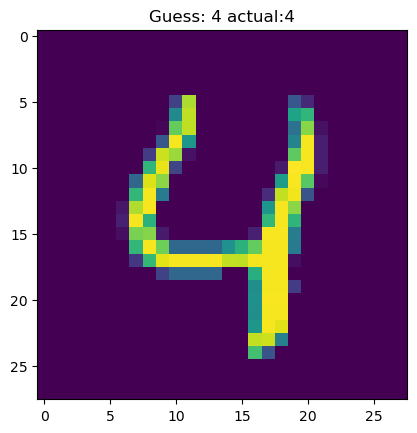

[4.60469669e-07 9.96708361e-01 1.53220711e-03 3.03447676e-04
 8.02612426e-06 8.81163389e-05 2.27258732e-05 8.82876712e-04
 4.20020590e-04 3.37576643e-05] 1


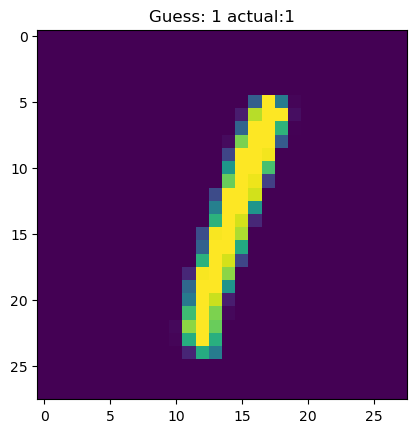

[2.31232008e-08 5.59488187e-06 7.72242063e-06 9.50712593e-06
 9.20776037e-01 1.29308130e-04 3.01801081e-06 3.52799321e-04
 4.09079374e-04 7.83069107e-02] 4


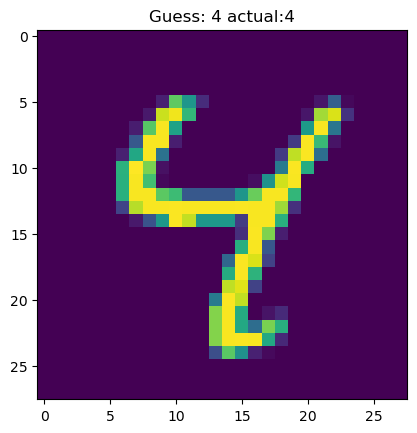

[8.73881085e-08 3.42751532e-04 2.54015547e-04 3.84731973e-04
 1.64964053e-01 2.36388907e-03 4.36992309e-06 1.14213424e-03
 3.69464731e-03 8.26849320e-01] 9


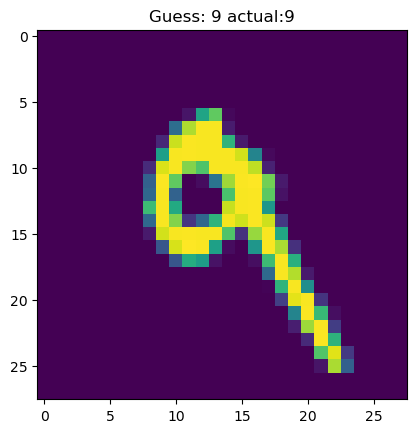

[1.32517658e-03 9.78573969e-07 2.34393091e-02 2.12426116e-07
 8.40857224e-01 2.60101441e-03 1.04850377e-01 6.44573974e-05
 2.02121242e-03 2.48400383e-02] 4


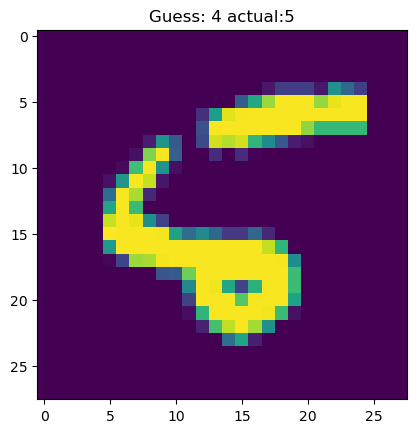

[9.17559078e-04 1.58267476e-07 1.66871379e-04 5.87942004e-06
 1.94809278e-02 9.08214630e-04 1.82483726e-04 2.94497519e-03
 1.61483511e-03 9.73778095e-01] 9


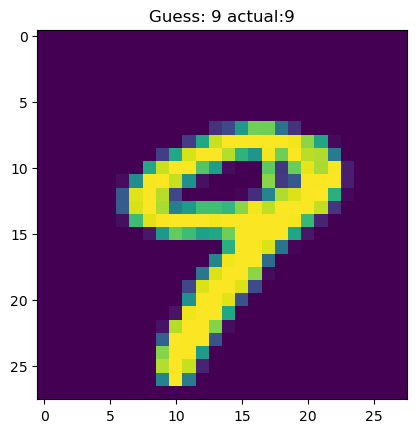

[9.22874731e-01 9.92428620e-06 8.08221387e-03 1.89672152e-03
 6.82729764e-05 5.06321567e-02 8.22217336e-03 2.63099458e-05
 8.17442571e-03 1.30702801e-05] 0


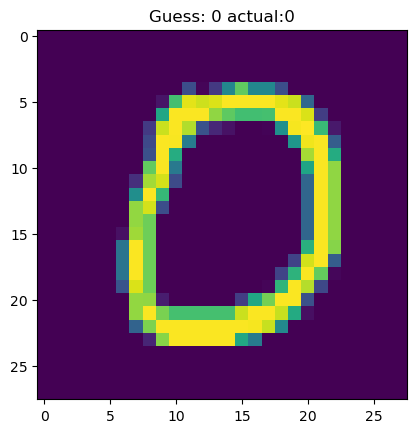

[6.24173235e-04 2.13044881e-04 1.19015370e-02 1.15033371e-03
 6.64588822e-03 4.05273068e-02 8.97020257e-01 8.96784288e-05
 4.17355935e-02 9.21873696e-05] 6


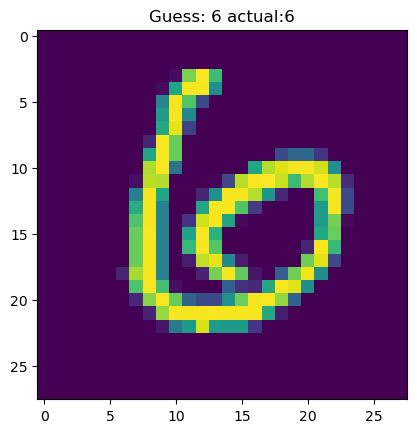

[3.99226860e-05 6.14282463e-08 5.59628363e-05 2.14914227e-05
 1.42249101e-01 1.56743109e-03 2.79550496e-05 1.08337920e-02
 1.11832800e-03 8.44085955e-01] 9


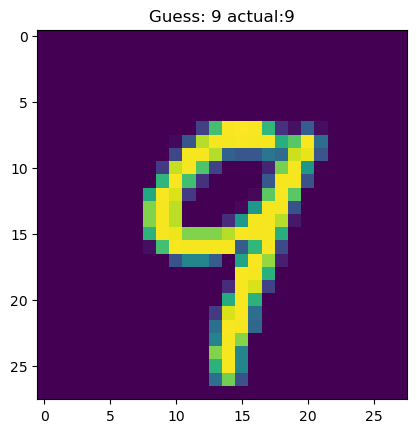

[9.71132460e-01 4.24419641e-07 3.00372526e-03 1.82757882e-04
 1.41149447e-04 1.73791865e-02 1.45949817e-04 8.92225210e-04
 6.54216026e-03 5.79961031e-04] 0


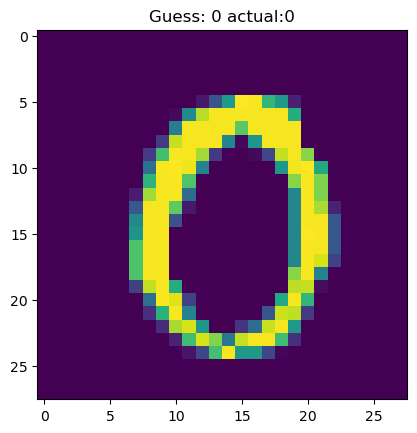

[1.07158916e-06 9.93437343e-01 3.33131859e-04 2.57602499e-03
 7.48683978e-06 7.80172838e-04 1.21080281e-03 3.99921978e-05
 1.29746427e-03 3.16509194e-04] 1


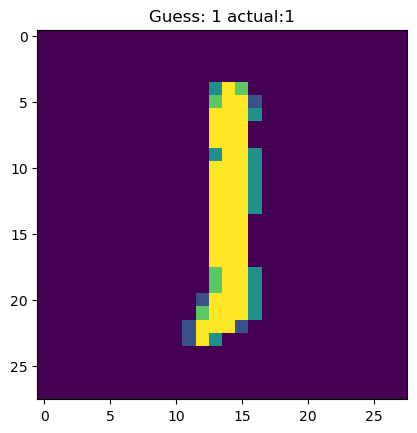

[2.54134109e-03 1.92244253e-03 9.90246881e-02 4.62460018e-02
 6.47545579e-04 1.67166873e-01 1.01751703e-04 1.44734815e-04
 6.82039749e-01 1.64872493e-04] 8


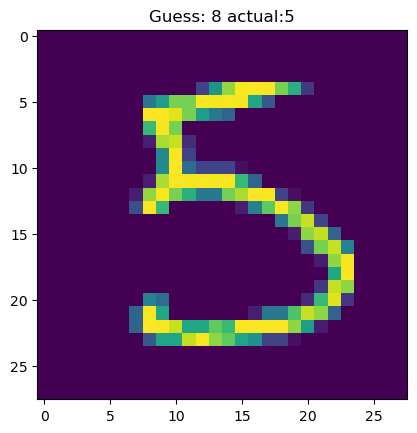

[5.00854598e-04 2.23902988e-07 7.72534055e-04 3.23198697e-05
 1.21393913e-01 7.39612543e-04 5.02515476e-04 1.49637597e-02
 6.12658342e-03 8.54967683e-01] 9


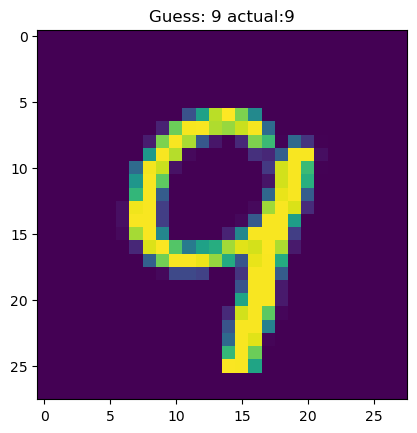

[8.61802055e-04 2.71590690e-05 6.21836913e-04 3.59158845e-03
 2.87114121e-06 2.64408735e-04 5.87249391e-07 9.93859055e-01
 4.70087565e-05 7.23683103e-04] 7


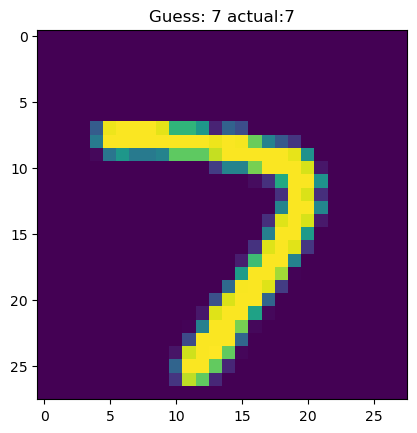

[2.80543532e-04 5.06258149e-02 1.56502595e-01 6.14720204e-01
 1.19736118e-05 1.04671819e-01 7.91962490e-03 1.26683022e-04
 6.45895746e-02 5.51166476e-04] 3


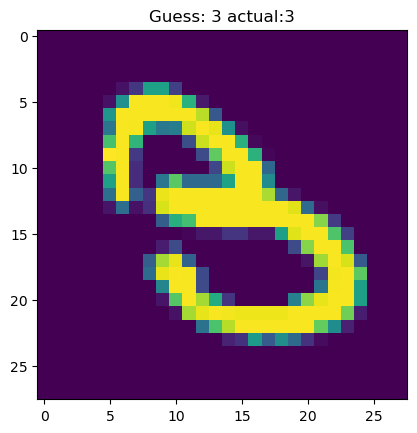

[2.30259742e-07 8.82783008e-09 8.48582613e-07 8.34257723e-08
 9.96997479e-01 2.23734264e-05 5.05184567e-06 1.13807880e-06
 5.51209120e-06 2.96727445e-03] 4


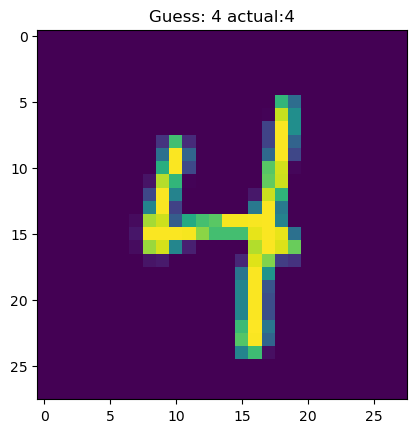

In [224]:
aL_test = nn_mnist_4.forward_prop_set(x_test)
print('For a trained network')
print('Test set probability :', 100*(np.floor( aL_test.T /  aL_test.max(axis = 1)).T * y_test).sum() / len(aL_test), '%')
for i in range(20):
    plt.imshow(x_test[i].reshape(im_width, im_height))
    print(aL_test[i],aL_test[i].argmax() )
    plt.title('Guess: ' + str(aL_test[i].argmax())+  ' actual:'+ str(y_test[i].argmax()))
    plt.show()